## DSM020 CW1 - Blake Livermore
## Report: "How to be happy? A study on indicators from a decade of world data."

### The following is my report and procedure for my exploratory data analysis of the World Happiness Report and combining of multiple datasets into one new dataset

#### Introduction
<p>My project is an investigation to analyse data based on "The World Happiness Report" with further data included to look for trends and characteristics within the data to see if we can find any indicators or factors which make a country happy (as defined by 'The World Happiness Report' - 'Life Ladder' scores.</p>
<p> This report will be a precursor to CW2 where I will analyse the data in detail to not only try and find trends but also potentially make a machine learning model to try and predict class based on region etc. and potentially include a country simulator to see how happy a fictional country would be and where they would fit on the scale.</p> 

#### Description of data set 
The base dataset for this is provided by ['The World Happiness Report'](https://worldhappiness.report/) [1] which is a publication of the United Nations Sustainable Development Solutions Network[5]. I chose this data source as they are a well trusted data reporter who have been producing The World Happiness Report for over a decade. They provide a base dataset for me to work from with a lot of factors already tabled together into a mostly complete dataset. They collected their data[2] for this report from 'Gallup World Poll'[3] surveys which are based on asking a portion of the population of each country a set of standardized questions rather than numeric tangible data[2]. For each country represented they use 2000-3000 respondents[2].

##### Limitations and added data
<p>'The World Happiness Report' provides downloadable data in csv format. The main limitation I find with 'The World Happiness Report' dataset is that several of the factors considered are quite subjective and simply based on opinion which leads it open to bias in many forms - this could include patriotism, people not wanting to give a bad answer to make their country look bad, cultural biases, some cultures are more optmistic than others so are likely to view their situation a better etc. - as well as a people simply into knowing the answer - your country may seem great to you if you have never travelled anywhere else to compare.</p>
<p>I also find the number of indicators they use to be fairly low and missing for factors I would love to look at and see if they correlate with the data. Because of this, I have decided to include further factors taken from other data sources to add to the data which I think would be both interesting to see the correlation with as well as what I think is something that I feel should have been included in the first place.</p>
<p>I have decided to include fertility rate (Possibly analysis connected to number of children vs. happiness), population (Possibly analysis connected to size of the population vs. happiness), and suicide rate - which I feel should be the ultimate indicator of if people are happy - (possibly analysis connected to suicide rate vs. happiness) as well as various classification values such as region which will likely be useful for predictions etc. later.</p>
<p>For these factors I have gathered data from a separate source, ['The World Bank'](https://www.worldbank.org/en/home), who provide separate datsets for each factor. These will need to be combined into one dataset before an EDA can be conducted.</p>

#### Descriptions of the data
In the final DataFrame, there are the following columns:
Country Name - The name of the country the data belongs to
<p><b>Year</b> - The year the data was recorded</p>
<p><b>Life Ladder</b> - Ranking given to the country based on average perceived scores of the respondents to the 'Gallup World Poll' survey.</p>
<p><b>Log GDP per capita</b> - The log of GDP per capita</p>
<p><b>Social support</b> - Average perceived value of social support of the respondents to the 'Gallup World Poll' survey.</p>
<p><b>Healthy life expectancy at birth</b> - Average life expectancy of the country</p>
<p><b>Freedom to make life choices</b> - Average perceived value of freedom to make choices of the respondents to the 'Gallup World Poll' survey.</p>
<p><b>Generosity</b> - Average perceived value of generosity in the country of the respondents to the 'Gallup World Poll' survey.</p>
<p><b>Perceptions of corruption</b> - Average perceived value of corruption of the respondents to the 'Gallup World Poll' survey.</p>
<p><b>Positive affect</b> - Average correlated positive effect in country</p>
<p><b>Negative affect</b> - Average correlated negative effect in country</p>
<p><b>Fertility Rate</b> - Average number of children per woman.</p>
<p><b>Suicide Rate</b>	-  Amount of suicides per 10,000 people.</p>
<p><b>Population</b> - The population of the country</p>
<p><b>Region</b> - Classifier - The geographical region of the country as per 'The World Bank'</p>
<p><b>IncomeGroup</b> - Classifier - The general band of income group the country falls into as per 'The World Bank'</p>

#### Ethical implications
<p>The data has been obtained from the above mentioned sources. All datasets used are opensource datasets free for public use and contain no personal data which needs anonymizing.</p>
<p>While the 'The World Happiness Report' is a widely used datasource on international happiness, it's results have been disputed - an example of this was by the New York Post which wrote a 2017 story titled 'That world happiness survey is complete crap'[6] https://nypost.com/2017/03/22/that-world-happiness-survey-is-complete-crap/ - as well as not always returning results in agreement with other sources on the issue[6]. 
<p>Others have questioned the methodology used in the questions pointing out the differences between actual experiences of wellbeing and a person's evaluations of it. Springer Link published a report 'The Measure Matters: An Investigation of Evaluative and Experience-Based Measures of Wellbeing in Time Use Data' (Dolan et. al, 2016)[7] which stated in conclusion: "In conclusion, the component of [measures of subjective wellbeing] assessed matters. We cannot know how well people’s lives are going by simply asking them to evaluate their life overall."[7]</p>
<p>With this in mind, this report is not designed to be viewed as a complete means to criteria which lead to happiness around the world, but rather as an analysis to and extension of 'The World Happiness Report'. Results of the analysis are not deemed to be representative of genuine happiness, which may be unique to an individual, but rather of the pre-decided ideas of what makes a country happy.</p>

In [1]:
# Importing on pandas and numpy which I will be using at various points throughout the report to produce dfs and for analysis
import pandas as pd
import numpy as np

In [2]:
# Import base dataset from 'The World Bank'
world_happiness_data = pd.read_csv('World Happiness Report.csv')
# Import World Bank datasets for Fertility Rate, Scuicide Rates, Population Size and Metadata for the countries
fertility_data = pd.read_csv('Fertility Rates World Bank.csv', skiprows = 3, header=1)
suicide_data = pd.read_csv('Scuicide Rates World Bank.csv', skiprows = 3, header=1)
population_data = pd.read_csv('Population Size Rates World Bank.csv', skiprows = 3, header=1)
country_meta_data = pd.read_csv('Metadata Country World Bank.csv', skiprows = 0, index_col=0)

<p>Initial first step is to view the data.head() to see what it generally looks like and check it has been imported correctly. I've put each in a seperate cell for simple visibility purposes.</p>
<p>Note: I added the skiprows=3 and header=1 to the pd.read_csv() above after looking at the output of .head(). I elected not to create new cells repeating these steps for readability purposes.</p>
<p>From there I will explore NaNs in the dfs to see how usable the data is. I'm performing two levels of NaN check. One on each columns of the whole data frame, and another on various decades as I suspect the data will become more accurate closer to the present year.</p>

In [3]:
# View head of fertility data
fertility_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,4.820,4.655,4.471,4.271,4.059,3.842,...,1.779,1.795,1.813,1.834,1.854,1.872,1.886,1.896,1.901,NaN
1,Afghanistan,AFG,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,7.450,7.450,7.450,7.450,7.450,7.450,...,5.770,5.562,5.359,5.163,4.976,4.800,4.633,4.473,4.321,NaN
2,Angola,AGO,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,6.708,6.790,6.872,6.954,7.036,7.116,...,6.120,6.039,5.953,5.864,5.774,5.686,5.600,5.519,5.442,NaN
3,Albania,ALB,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,6.489,6.401,6.282,6.133,5.960,5.773,...,1.673,1.684,1.690,1.688,1.677,1.659,1.638,1.617,1.597,NaN
4,Andorra,AND,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Check the shape of df
print("Shape of df: " + str(fertility_data.shape))

# Get a count of NA values at various decades
print("NA count for years 1960, 1980, 2000, and 2010 is:")
print(fertility_data['1960'].isna().sum(), fertility_data['1980'].isna().sum(), fertility_data['2000'].isna().sum(), fertility_data['2010'].isna().sum())

# Get a count of NA values across table
print(fertility_data.iloc[:,4:].isna().sum())

# Find info on column types etc.
fertility_data.info()

Shape of df: (264, 65)
NA count for years 1960, 1980, 2000, and 2010 is:
28 26 18 17
1960     28
1961     27
1962     28
1963     29
1964     28
       ... 
2016     18
2017     18
2018     18
2019     18
2020    264
Length: 61, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 65 columns):
Country Name      264 non-null object
Country Code      264 non-null object
Indicator Name    264 non-null object
Indicator Code    264 non-null object
1960              236 non-null float64
1961              237 non-null float64
1962              236 non-null float64
1963              235 non-null float64
1964              236 non-null float64
1965              236 non-null float64
1966              236 non-null float64
1967              236 non-null float64
1968              236 non-null float64
1969              236 non-null float64
1970              237 non-null float64
1971              238 non-null float64
1972              239 non-null fl

In [5]:
# View head of suicide data 
suicide_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,"Suicide mortality rate (per 100,000 population)",SH.STA.SUIC.P5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,"Suicide mortality rate (per 100,000 population)",SH.STA.SUIC.P5,NaN,NaN,NaN,NaN,NaN,NaN,...,4.1,4.0,4.0,3.9,4.0,4.0,4.1,4.1,4.1,NaN
2,Angola,AGO,"Suicide mortality rate (per 100,000 population)",SH.STA.SUIC.P5,NaN,NaN,NaN,NaN,NaN,NaN,...,6.6,6.9,6.9,6.4,6.5,6.2,6.0,6.0,6.1,NaN
3,Albania,ALB,"Suicide mortality rate (per 100,000 population)",SH.STA.SUIC.P5,NaN,NaN,NaN,NaN,NaN,NaN,...,7.9,5.2,5.3,5.0,4.8,4.7,4.7,4.5,4.3,NaN
4,Andorra,AND,"Suicide mortality rate (per 100,000 population)",SH.STA.SUIC.P5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Check the shape of df
print("Shape of df: " + str(suicide_data.shape))

# Get a count of NA values at various decades
print("NA count for years 1960, 1980, 2000, and 2010 is:")
print(suicide_data['1960'].isna().sum(), suicide_data['1980'].isna().sum(), suicide_data['2000'].isna().sum(), suicide_data['2010'].isna().sum())

# Get a count of NA values across table
print(suicide_data.iloc[:,4:].isna().sum())

# Find info on column types etc.
suicide_data.info()

Shape of df: (264, 65)
NA count for years 1960, 1980, 2000, and 2010 is:
264 264 35 35
1960    264
1961    264
1962    264
1963    264
1964    264
       ... 
2016     35
2017     35
2018     35
2019     35
2020    264
Length: 61, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 65 columns):
Country Name      264 non-null object
Country Code      264 non-null object
Indicator Name    264 non-null object
Indicator Code    264 non-null object
1960              0 non-null float64
1961              0 non-null float64
1962              0 non-null float64
1963              0 non-null float64
1964              0 non-null float64
1965              0 non-null float64
1966              0 non-null float64
1967              0 non-null float64
1968              0 non-null float64
1969              0 non-null float64
1970              0 non-null float64
1971              0 non-null float64
1972              0 non-null float64
1973              

In [7]:
# View head of population data
population_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,102046.0,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0,106314.0,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,...,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0,38041754.0,NaN
2,Angola,AGO,"Population, total",SP.POP.TOTL,5454933.0,5531472.0,5608539.0,5679458.0,5735044.0,5770570.0,...,24220661.0,25107931.0,26015780.0,26941779.0,27884381.0,28842484.0,29816748.0,30809762.0,31825295.0,NaN
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,2854191.0,NaN
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,83747.0,82427.0,80774.0,79213.0,78011.0,77297.0,77001.0,77006.0,77142.0,NaN


In [8]:
#  Check the shape of df 
print("Shape of df: " + str(population_data.shape))

# Get a count of NA values at various decades
print("NA count for years 1960, 1980, 2000, and 2010 is:")
print(population_data['1960'].isna().sum(), population_data['1980'].isna().sum(), population_data['2000'].isna().sum(), population_data['2010'].isna().sum())

# Get a count of NA values across table
print(population_data.iloc[:,4:].isna().sum())

# Find info on column types etc.
population_data.info()

Shape of df: (264, 65)
NA count for years 1960, 1980, 2000, and 2010 is:
2 2 1 1
1960      2
1961      2
1962      2
1963      2
1964      2
       ... 
2016      2
2017      2
2018      2
2019      2
2020    264
Length: 61, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 65 columns):
Country Name      264 non-null object
Country Code      264 non-null object
Indicator Name    264 non-null object
Indicator Code    264 non-null object
1960              262 non-null float64
1961              262 non-null float64
1962              262 non-null float64
1963              262 non-null float64
1964              262 non-null float64
1965              262 non-null float64
1966              262 non-null float64
1967              262 non-null float64
1968              262 non-null float64
1969              262 non-null float64
1970              262 non-null float64
1971              262 non-null float64
1972              262 non-null float6

<p>All of these datasets are taken from the World Bank so are fortunately in the same format meaning the steps to clean the data the same for each dataset will be the same.</p>

In [9]:
# View head of country_meta_data
country_meta_data.head()

,Region,IncomeGroup,SpecialNotes,TableName
Country Code,,,,
ABW,Latin America & Caribbean,High income,NaN,Aruba
AFG,South Asia,Low income,NaN,Afghanistan
AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola
ALB,Europe & Central Asia,Upper middle income,NaN,Albania
AND,Europe & Central Asia,High income,NaN,Andorra


This is meta data also from the World Bank datasets. It is quite useful as it has split the countries into geographic and income based regions. This could be useful later if I intend to implement a classification algorithm in CW2, so will join them into the greater dataset.

In [10]:
# View head of world_happiness_data
world_happiness_data.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


From the initial head view this data seems promising but I am not sure all columns will have complete data and also that each country will have the same entries and number of years present so I want to investigate this further to see what years and values are present for each country.

In [11]:
# Identity if NaN values are present in each column
world_happiness_data.isnull().any()

Country name                        False
year                                False
Life Ladder                         False
Log GDP per capita                   True
Social support                       True
Healthy life expectancy at birth     True
Freedom to make life choices         True
Generosity                           True
Perceptions of corruption            True
Positive affect                      True
Negative affect                      True
dtype: bool

In [12]:
# Identity how many NaN values are in each column
print(len(world_happiness_data))
print(world_happiness_data.isna().sum())

1949
Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                   36
Social support                       13
Healthy life expectancy at birth     55
Freedom to make life choices         32
Generosity                           89
Perceptions of corruption           110
Positive affect                      22
Negative affect                      16
dtype: int64


<p>Some of the values in the columns are missing. This will need to be taken care of but less than 10% of values at most are missing which is a promising sign. </p>
<p>The next step is to check how many entries there are for each year, as this is more of a concern if some countries have many more years recorded than others.</p>

In [13]:
# Identify how many years are recorded for each country
count_per_country = world_happiness_data.groupby('Country name')['year'].nunique()
print(count_per_country)
# Mean average number of year entries per country
print("\nMean number of year entries for a country: " + str(round(np.mean(count_per_country), 0)))
# Most amount of years entered for a country
print("Max number of year entries for a country: " + str(max(count_per_country)))
# Least amount of years entered for a country
print("Min number of year entries for a country: " + str(min(count_per_country)) + '\n')
# How many countries have data for this year 
value_counts_years = world_happiness_data['year'].value_counts()
print(value_counts_years.sort_values)

Country name
Afghanistan    12
Albania        13
Algeria         8
Angola          4
Argentina      15
               ..
Venezuela      15
Vietnam        14
Yemen          12
Zambia         14
Zimbabwe       15
Name: year, Length: 166, dtype: int64

Mean number of year entries for a country: 12.0
Max number of year entries for a country: 15
Min number of year entries for a country: 1

<bound method Series.sort_values of 2017    147
2011    146
2014    145
2019    144
2015    143
2018    142
2016    142
2012    142
2013    137
2010    124
2009    114
2008    110
2007    102
2020     95
2006     89
2005     27
Name: year, dtype: int64>


<p>As suspected, there is huge variability between the value counts for years for each county. The max amount recorded is 15 while the min is only 1. Lucky there 12 recorded on average per country, suggesting most countries have enough years to compare to each other through time.</p>
<p>Looking at the value counts by year, it appears the data is quite consistent for 2012-2019 with at least 142/146 entries for country's data entered for each year. I would like to do at least a decade for time comparison. Looking at the value counts from 2010-2019 there are at least 124/146 entries for each year. While not quite as reliable for comparison, I am happy enough with 124 values, especially given the values over the most recent 8 years are very high and consistent.</p>

#### Modifying datasets to get subset years

After seeing the df head and NaN values for each column, it is clear that the fertility_data and suicide_data datasets are missing large amounts of data for earlier years - particularly the suicide dataset. Given this and the fact that 

In [14]:
# Remove columns from 'Country Code' to '2009' (This inludes previous years as well as other columns I don't want)
fertility_data.drop(fertility_data.iloc[:,1:fertility_data.columns.get_loc('2010')], axis = 1, inplace = True)
suicide_data.drop(suicide_data.iloc[:,1:suicide_data.columns.get_loc('2010')], axis = 1, inplace = True)
population_data.drop(population_data.iloc[:,1:population_data.columns.get_loc('2010')], axis = 1, inplace = True)

In [15]:
fertility_data.head()

,Country Name,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,1.768,1.779,1.795,1.813,1.834,1.854,1.872,1.886,1.896,1.901,NaN
1,Afghanistan,5.977,5.770,5.562,5.359,5.163,4.976,4.800,4.633,4.473,4.321,NaN
2,Angola,6.194,6.120,6.039,5.953,5.864,5.774,5.686,5.600,5.519,5.442,NaN
3,Albania,1.660,1.673,1.684,1.690,1.688,1.677,1.659,1.638,1.617,1.597,NaN
4,Andorra,1.270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
suicide_data.head()

,Country Name,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,4.3,4.1,4.0,4.0,3.9,4.0,4.0,4.1,4.1,4.1,NaN
2,Angola,7.0,6.6,6.9,6.9,6.4,6.5,6.2,6.0,6.0,6.1,NaN
3,Albania,7.8,7.9,5.2,5.3,5.0,4.8,4.7,4.7,4.5,4.3,NaN
4,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
population_data.head()

,Country Name,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,101669.0,102046.0,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0,106314.0,NaN
1,Afghanistan,29185507.0,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0,38041754.0,NaN
2,Angola,23356246.0,24220661.0,25107931.0,26015780.0,26941779.0,27884381.0,28842484.0,29816748.0,30809762.0,31825295.0,NaN
3,Albania,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,2854191.0,NaN
4,Andorra,84449.0,83747.0,82427.0,80774.0,79213.0,78011.0,77297.0,77001.0,77006.0,77142.0,NaN


In [18]:
# Drop 2020 data (as although it's the most recent year, it's not filled in)
fertility_data.drop(columns='2020', axis = 1, inplace = True)
suicide_data.drop(columns='2020', axis = 1, inplace = True)
population_data.drop(columns='2020', axis = 1, inplace = True)

In [19]:
# Drop values in country_meta_data to keep only future class identifiers
country = country_meta_data.drop(country_meta_data.columns[2], axis = 1)
#country = country.drop(country_meta_data.columns[2], axis = 1)
country.head()

,Region,IncomeGroup,TableName
Country Code,,,
ABW,Latin America & Caribbean,High income,Aruba
AFG,South Asia,Low income,Afghanistan
AGO,Sub-Saharan Africa,Lower middle income,Angola
ALB,Europe & Central Asia,Upper middle income,Albania
AND,Europe & Central Asia,High income,Andorra


In [20]:
# Drop values in country_meta_data to keep only future class identifiers
country_meta_data.drop(country_meta_data.columns[2], axis = 1, inplace = True)
country_meta_data.head()

,Region,IncomeGroup,TableName
Country Code,,,
ABW,Latin America & Caribbean,High income,Aruba
AFG,South Asia,Low income,Afghanistan
AGO,Sub-Saharan Africa,Lower middle income,Angola
ALB,Europe & Central Asia,Upper middle income,Albania
AND,Europe & Central Asia,High income,Andorra


In [21]:
# Select range from 2010-2019 by removing all years in world_happiness_data before 2010 and year 2020
world_happiness_data = world_happiness_data.drop(world_happiness_data[world_happiness_data['year'] < 2010].index)
world_happiness_data = world_happiness_data.drop(world_happiness_data[world_happiness_data['year'] == 2020].index)

In [22]:
# Check head and length
print(len(world_happiness_data))
world_happiness_data.head()

1412


,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
5,Afghanistan,2013,3.572,7.725,0.484,52.56,0.578,0.061,0.823,0.621,0.273
6,Afghanistan,2014,3.131,7.718,0.526,52.88,0.509,0.104,0.871,0.532,0.375


<p>This now gives us the data for the years that we will be working with.</p>
<p>Unfortunately the data for the World Happiness Report (which will be the backbone dataset we are working with) is in a very different format with year as a variable in it's own column rather than being the measure for the entire axis. Alas, you can't get lucky all the time. This will mean the other datasets need formatting to match this dataset for combining into one new dataset.</p>

#### Melting dfs to format needed

In [23]:
# Melt the df to match the format of the main World Happinesss df
melt_data_population = pd.melt(population_data, id_vars="Country Name", var_name="Year").rename(columns={"value": "Population"})
melt_data_fertility = pd.melt(fertility_data, id_vars="Country Name", var_name="Year").rename(columns={"value": "Fertility Rate"})
melt_data_suicide = pd.melt(suicide_data, id_vars="Country Name", var_name="Year").rename(columns={"value": "Suicide Rate"})

In [24]:
melt_data_fertility.head()

,Country Name,Year,Fertility Rate
0,Aruba,2010,1.768
1,Afghanistan,2010,5.977
2,Angola,2010,6.194
3,Albania,2010,1.660
4,Andorra,2010,1.270


In [25]:
melt_data_suicide.head()

,Country Name,Year,Suicide Rate
0,Aruba,2010,NaN
1,Afghanistan,2010,4.3
2,Angola,2010,7.0
3,Albania,2010,7.8
4,Andorra,2010,NaN


In [26]:
melt_data_population.head()

,Country Name,Year,Population
0,Aruba,2010,101669.0
1,Afghanistan,2010,29185507.0
2,Angola,2010,23356246.0
3,Albania,2010,2913021.0
4,Andorra,2010,84449.0


In [27]:
world_happiness_data = world_happiness_data.rename(columns={"Country name": "Country Name", "year" : "Year"})
world_happiness_data.head()

,Country Name,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
5,Afghanistan,2013,3.572,7.725,0.484,52.56,0.578,0.061,0.823,0.621,0.273
6,Afghanistan,2014,3.131,7.718,0.526,52.88,0.509,0.104,0.871,0.532,0.375


In [28]:
# Sort the data by 'Country Name' and 'Year' and reset indices 
melt_data_population = melt_data_population.sort_values(["Country Name", "Year"]).reset_index(drop=True)
melt_data_fertility = melt_data_fertility.sort_values(["Country Name", "Year"]).reset_index(drop=True)
melt_data_suicide = melt_data_suicide.sort_values(["Country Name", "Year"]).reset_index(drop=True)

In [29]:
melt_data_population.head()

,Country Name,Year,Population
0,Afghanistan,2010,29185507.0
1,Afghanistan,2011,30117413.0
2,Afghanistan,2012,31161376.0
3,Afghanistan,2013,32269589.0
4,Afghanistan,2014,33370794.0


#### Merging the dfs

In [30]:
# Check lengths on dfs to see what kind of join we want
print(len(melt_data_population))
print(len(melt_data_fertility))
print(len(melt_data_suicide))
print(len(country_meta_data))
print(len(world_happiness_data))

2640
2640
2640
263
1412


The base df we will be working with is the World Happiness Index df. It has considerably less entries, 1949, than the melt_data dfs I will be joining to it, 2640. As it is the base df I will be building on, I will left-join the data to make sure we keep all the rows in world_happiness_data. I suspect the increased number of rows in the melp_data dfs is from customized, combination data such as 'Arab nations', which we don't need.

In [31]:
# Tidy the data by making data types match so they can be left joined correctly and aviod issues in joining stage below
melt_data_fertility['Year'] = melt_data_fertility['Year'].astype(int)
world_happiness_data['Year'] = world_happiness_data['Year'].astype(int)
melt_data_suicide['Year'] = melt_data_suicide['Year'].astype(int)
melt_data_population['Year'] = melt_data_population['Year'].astype(int)

melt_data_fertility['Country Name'] = melt_data_fertility['Country Name'].astype(str)
melt_data_suicide['Country Name'] = melt_data_suicide['Country Name'].astype(str)
melt_data_population['Country Name'] = melt_data_population['Country Name'].astype(str)
world_happiness_data['Country Name'] = world_happiness_data['Country Name'].astype(str)
country_meta_data['TableName'] = country_meta_data['TableName'].astype(str)
country_meta_data.rename(columns={"TableName": "Country Name"}, inplace=True)

In [32]:
print(country_meta_data)

                                  Region          IncomeGroup  Country Name
Country Code                                                               
ABW            Latin America & Caribbean          High income         Aruba
AFG                           South Asia           Low income   Afghanistan
AGO                   Sub-Saharan Africa  Lower middle income        Angola
ALB                Europe & Central Asia  Upper middle income       Albania
AND                Europe & Central Asia          High income       Andorra
...                                  ...                  ...           ...
XKX                Europe & Central Asia  Upper middle income        Kosovo
YEM           Middle East & North Africa           Low income   Yemen, Rep.
ZAF                   Sub-Saharan Africa  Upper middle income  South Africa
ZMB                   Sub-Saharan Africa  Lower middle income        Zambia
ZWE                   Sub-Saharan Africa  Lower middle income      Zimbabwe

[263 rows x

In [33]:
# Left join world_happiness_data with melt_data_fertility
full_df = pd.merge(world_happiness_data, melt_data_fertility, on=['Country Name', 'Year'], how='left')
# Left join world_happiness_data with melt_data_suicide
full_df = pd.merge(full_df, melt_data_suicide, on=['Country Name', 'Year'], how='left')
# Left join world_happiness_data with melt_data_population
full_df = pd.merge(full_df, melt_data_population, on=['Country Name', 'Year'], how='left')
# Left join world_happiness_data with country_meta_data
full_df = pd.merge(full_df, country_meta_data, on=['Country Name'], how='left')

In [34]:
# Check the new df to make sure all three new columns have been added correctly and that no rows have accidently been dropped
print(len(full_df))
full_df.head()

1412


,Country Name,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Fertility Rate,Suicide Rate,Population,Region,IncomeGroup
0,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275,5.977,4.3,29185507.0,South Asia,Low income
1,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267,5.770,4.1,30117413.0,South Asia,Low income
2,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268,5.562,4.0,31161376.0,South Asia,Low income
3,Afghanistan,2013,3.572,7.725,0.484,52.56,0.578,0.061,0.823,0.621,0.273,5.359,4.0,32269589.0,South Asia,Low income
4,Afghanistan,2014,3.131,7.718,0.526,52.88,0.509,0.104,0.871,0.532,0.375,5.163,3.9,33370794.0,South Asia,Low income


<p>Now all the tables have been joined to make the new, complete df.</p>
<p>It should be noted one slight issue in the fact the meta data is based on the current year but I have joined it with each value in the df. For the 'Region' column, this is not a problem at all as they do not change with time. For the 'IncomeGroup' column, this could potentially change with time with a nation moving up or down the income hierarchy, although very little change would be expected. For accuracy of classification purposes, I would rather keep the countries 'IncomeGroup' consistent throughout the period. Given how few categories there are and the fact nations don't tend to change categories e.g. 'Low Income' to 'High Income' very often or quickly, I don't believe it will introduce a statistically insignificant level of inaccuracy, if any at all. </p>
<p>At this point, we now have a working DataFrame with all the factors added which I will be analyzing to check for correlation etc. Now it needs to be cleaned before use to fix NaN etc. which are still present in the data.</p>

#### What to do with our NaNs?

In [35]:
# Identity if NaN values are present in each column
full_df.isnull().any()

Country Name                        False
Year                                False
Life Ladder                         False
Log GDP per capita                   True
Social support                       True
Healthy life expectancy at birth     True
Freedom to make life choices         True
Generosity                           True
Perceptions of corruption            True
Positive affect                      True
Negative affect                      True
Fertility Rate                       True
Suicide Rate                         True
Population                           True
Region                               True
IncomeGroup                          True
dtype: bool

In [36]:
# Check amount of NaNs for each column
print(full_df.isna().sum())

Country Name                          0
Year                                  0
Life Ladder                           0
Log GDP per capita                   27
Social support                       10
Healthy life expectancy at birth     45
Freedom to make life choices         20
Generosity                           46
Perceptions of corruption            86
Positive affect                      16
Negative affect                      12
Fertility Rate                      155
Suicide Rate                        165
Population                          155
Region                              155
IncomeGroup                         155
dtype: int64


<p>As we can see from the information above, some columns have a large amount of NaNs. In particular the three just added to the df have over 10% of column values as 10%.</p>
<p>As the main World Happiness Report df is from a different source than the other three dfs joined to it, I suspect there may be a difference in the standards use for recording of countries. For exam, Hong Kong may be in one df but not another. As I have no way of knowing what countries/deemed countries they may or may not have included or the names given to them, to investing this further, I decided to look at the results manually out of Jupyter by exporting it to an excel file.</p>

In [37]:
full_df.to_excel('data_checkpoint_1.xlsx')

<p>A quick scroll through of the data finds my suspicion is correct. Many of the cases where 'Fertility Rate', 'Suicide Rate', and 'Population' are producing NaN values are from disputed countries/regions etc. These include for example 'Hong Kong S.A.R. of China', 'Palestinian Territories', and 'Somaliland region'.</p> 
<p>While more data is generally good, I don't need to include 100% of countries to be able to make accurate predictions so these values can be dropped from the df. In most of these cases, they are smaller regions which I don't want to risk the integrity of the data for their inclusion. They also tend to have inconsistent data records and for ethical reasons, I don't want include what is potentially unreliable or disputed data.</p> 
<p>My quick check also revealed many countries which are not disputed, and in some cases rather important nations on the world scene, also do not have data for 'Fertility Rate', 'Suicide Rate', and 'Population'. These include 'Venezuela', 'South Korea', 'Yemen', and 'Russia' for example. While I would prefer to keep their values in the df, there is a large amount of reliable data without them and I deem the reliability of the data included to be of more importance than the fullness of the dataset. For this reason, I will exclude these values too.</p>

In [163]:
# Remove all rows which don't have values for the new columns ['Fertility Rate', 'Suicide Rate', 'Population', 'Region', 'IncomeGroup']
# Note: As all the data from these columns came from The World Bank they have the same values missing so I can chose any one to delete to remove the whole row.
full_df_notna = full_df[full_df['Population'].notna()]

# Check new length and head to see if all looks as expected
print(len(full_df_notna))
full_df_notna.head()

1257


,Country Name,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Fertility Rate,Suicide Rate,Population,Region,IncomeGroup
0,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275,5.977,4.3,29185507.0,South Asia,Low income
1,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267,5.770,4.1,30117413.0,South Asia,Low income
2,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268,5.562,4.0,31161376.0,South Asia,Low income
3,Afghanistan,2013,3.572,7.725,0.484,52.56,0.578,0.061,0.823,0.621,0.273,5.359,4.0,32269589.0,South Asia,Low income
4,Afghanistan,2014,3.131,7.718,0.526,52.88,0.509,0.104,0.871,0.532,0.375,5.163,3.9,33370794.0,South Asia,Low income


To confirm I am happy with the list I removed, I can compare the unique values in the two dfs to see that not too many have been removed.

In [39]:
# Double check list of countries removed by finding difference between values in old and new df
diff_countries_list = np.setdiff1d(full_df['Country Name'].unique(),full_df_notna['Country Name'].unique())
print(diff_countries_list)

['Congo (Brazzaville)' 'Congo (Kinshasa)' 'Egypt' 'Gambia'
 'Hong Kong S.A.R. of China' 'Iran' 'Ivory Coast' 'Kyrgyzstan' 'Laos'
 'North Cyprus' 'Palestinian Territories' 'Russia' 'Slovakia'
 'Somaliland region' 'South Korea' 'Swaziland' 'Syria'
 'Taiwan Province of China' 'Venezuela' 'Yemen']


As expected, the removed countries contained largely territories and countries affected by war etc. which may affect the validity of the data. There are also some countries I would have preferred to have in the analysis, but only a small amount have been removed. 

In [164]:
# Check new amount of NaNs for each column
print(len(full_df_notna))
print(full_df_notna.isna().sum())

1257
Country Name                         0
Year                                 0
Life Ladder                          0
Log GDP per capita                   7
Social support                      10
Healthy life expectancy at birth    10
Freedom to make life choices        19
Generosity                          24
Perceptions of corruption           80
Positive affect                     16
Negative affect                     12
Fertility Rate                       0
Suicide Rate                        10
Population                           0
Region                               0
IncomeGroup                          0
dtype: int64


The amount of NaNs has been reduced substantially now and reduced to zero in the added columns, which is very good to see. There are however still more to deal with from the original dataset.

In [41]:
# Check to see counts of entries per country
country_counts = full_df_notna.groupby('Country Name').count()
country_counts

,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Fertility Rate,Suicide Rate,Population,Region,IncomeGroup
Country Name,,,,,,,,,,,,,,,
Afghanistan,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
Albania,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
Algeria,8,8,8,7,8,6,6,6,7,7,8,8,8,8,8
Angola,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
Argentina,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uruguay,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
Uzbekistan,10,10,10,10,10,9,10,9,10,10,10,10,10,10,10
Vietnam,10,10,10,9,10,7,9,7,9,9,10,10,10,10,10


<p>As well as the NaNs, there are some countries which don't have entries for all 10 years from 2010-2019. While having all years available would be idea, I won't necessarily need all of them to perform comparative analysis, run classifications etc.</p>
<p>I'm not 100% sure how many values will be need to get accurate classification results etc. but it's very doubtful that any countries with less than 4  years of data will consistently return reliable results. At this point, I've decided to remove all countries with less than 4 year entries. I also suspect this may clean up some of the NaNs as if they are less able to supply data each year, it is quite possible they haven't supplied all the data values.</p>
<p>Note: I may relook at this later decide to change the selection criteria (to countries with less than 5 entries etc.), but will look at this at a later stage most likely during classification predictions in CW2.</p>

#### Remove countries with few year entries

In [45]:
# Make a df of countries with less than 4 entries
full_df_big_entries = full_df_notna.groupby('Country Name').count()
remove_countries = full_df_big_entries[full_df_big_entries['Year']<=3]
remove_countries

,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Fertility Rate,Suicide Rate,Population,Region,IncomeGroup
Country Name,,,,,,,,,,,,,,,
Belize,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Bhutan,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
Burundi,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
Djibouti,2,2,2,1,2,2,2,2,1,1,2,2,2,2,2
Maldives,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1
Oman,1,1,1,0,1,1,1,0,0,1,1,1,1,1,1
Somalia,3,3,0,3,3,3,0,3,3,3,3,3,3,3,3
Suriname,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Trinidad and Tobago,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3


In [165]:
# Remove the countries with less than 4 values from full_df_notna
full_df_notna = full_df_notna[~full_df_notna['Country Name'].isin(remove_countries.index)]

In [146]:
# Check new amount of NaNs for each column
print(len(full_df_notna))
print(full_df_notna.isna().sum())

1239
Country Name                         0
Year                                 0
Life Ladder                          0
Log GDP per capita                   4
Social support                       8
Healthy life expectancy at birth    10
Freedom to make life choices        19
Generosity                          21
Perceptions of corruption           78
Positive affect                     13
Negative affect                     10
Fertility Rate                       0
Suicide Rate                        10
Population                           0
Region                               0
IncomeGroup                          0
dtype: int64


Now that the countries with few year entries have been removed, I will now look into each of the remaining NaN values to see if there are any countries which have large amounts of NaNs in any one area.

#### Investigate NaNs in detail to see if countries need to be dropped or if they can be handled another way

In [92]:
# Show amount of NaNs for each each country for each column
for column in full_df_notna:
    nans = full_df_notna[column].isnull().groupby(full_df_notna['Country Name']).sum().astype(int).reset_index(name='count').sort_values(by='count', ascending = False)
    nans = nans[nans['count'] > 0]
    print(len(nans))
    print(str(column) +'\n' + str(nans))

0
Country Name
Empty DataFrame
Columns: [Country Name, count]
Index: []
0
Year
Empty DataFrame
Columns: [Country Name, count]
Index: []
0
Life Ladder
Empty DataFrame
Columns: [Country Name, count]
Index: []
1
Log GDP per capita
    Country Name  count
112  South Sudan      4
7
Social support
             Country Name  count
102                 Qatar      2
127  United Arab Emirates      1
2                 Algeria      1
132               Vietnam      1
83                Morocco      1
64                 Kuwait      1
9                 Bahrain      1
1
Healthy life expectancy at birth
   Country Name  count
63       Kosovo     10
12
Freedom to make life choices
             Country Name  count
26                  China      3
132               Vietnam      3
118            Tajikistan      2
2                 Algeria      2
102                 Qatar      2
9                 Bahrain      1
124          Turkmenistan      1
54                   Iraq      1
127  United Arab Emirates      1


<p>Looking at the NaN per country per column gave me a better idea of which NaNs are potential issues, which are solvable issues, and which may need to be dropped.</p>
<p>Six countries, 'China', 'Jordan', 'Saudi Arabia', 'United Arab Emirates', 'Turkmenistan', 'Kuwait', are missing 7 or more values for 'Perceptions of corruption'. This initially concerned me a lot. After looking at the value counts of the data (df below), it became clear they had fairly complete data other than for 'Perceptions of corruption'. With this considered, I have chosen to leave their data in the df and instead drop the few values they do have for 'Perceptions of corruption' and take into account the exclude of this column in their anaylsis and predictions in CW2. I'm satisfied with the reliability of results from it and think there is value to be gained in leaving good data in without one column rather than dropping each country because of it. Given this part of the dataset came from 'The World Happiness Report' itself, they must have also chosen to deal with it in a similar way.</p>
<p>Kososvo on the other hand accounts for 100% of the 10 missing values for 'Healthy life expectancy at birth' and 'Suicide Rate'. Given this is the only country missing values for these and it is missing 100% of it's values, I will drop it from the df.</p>
<p>Note: Kuwait is very borderline on 'Generosity' but I have decided to leave it in for now and to attempt to use it with the 5 values it has in the area. If it proves unreliable, I may revisit this decision later.</p>

In [102]:
# Number of data points each country has in each column
country_counts.loc[['China', 'Jordan', 'Saudi Arabia', 'United Arab Emirates', 'Kosovo', 'Turkmenistan', 'Kuwait']]

,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Fertility Rate,Suicide Rate,Population,Region,IncomeGroup
Country Name,,,,,,,,,,,,,,,
China,10,10,10,10,10,7,10,0,10,10,10,10,10,10,10
Jordan,10,10,10,10,10,10,10,0,8,8,10,10,10,10,10
Saudi Arabia,10,10,10,10,10,10,10,0,10,10,10,10,10,10,10
United Arab Emirates,10,10,10,9,10,9,7,1,8,9,10,10,10,10,10
Kosovo,10,10,10,10,0,10,10,10,10,10,10,0,10,10,10
Turkmenistan,9,9,9,9,9,8,9,0,9,9,9,9,9,9,9
Kuwait,9,9,9,8,9,8,5,2,8,8,9,9,9,9,9


In [166]:
# Drop Kosovo from df
# Find indices of 'Qatar' values
kosovo_indices = full_df_notna[full_df_notna['Country Name'] == 'Kosovo'].index
# Check length of df before drop
print(len(full_df_notna))
# Drop 'Kosovo' vlaues
full_df_notna.drop(kosovo_indices, inplace = True)
# Check length of df after drop to confirm
print(len(full_df_notna))

1239
1229


<p>I also decided to have a closer look at 'Qatar', 'Algeria', 'South Sudan', which popped up multiple times for having NaNs.</p>
<p>Looking at them on a case by case basis, Algeria has at least 75% of values in all columns with the majority of them having 100% of values. I decided to leave it in. South Sudan drew my attention due to it having 4 missing values in 'Generosity' and 'Log GDP per capita'. Their data was actually complete other than 'Generosity' so could theoretically be left in but as it is missing 100% of it's values for both factors, it won't be possible to impute and may prove an issue. As such, I will drop it from the df.</p>
<p>Qatar on the other hand consistently has values missing in many columns, often as much as 50% of the values. Given this, and added to the fact it only has 4 year entries to start with, I've decided to drop Qatar from the df for the purposes of data reliability.</p>

In [50]:
# Number of data points each country has in each column
country_counts.loc[['Qatar', 'Algeria', 'South Sudan']]

,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Fertility Rate,Suicide Rate,Population,Region,IncomeGroup
Country Name,,,,,,,,,,,,,,,
Qatar,4,4,4,2,4,2,3,0,2,2,4,4,4,4,4
Algeria,8,8,8,7,8,6,6,6,7,7,8,8,8,8,8
South Sudan,4,4,0,4,4,4,0,4,4,4,4,4,4,4,4


In [167]:
# Drop Qatar from df
# Find indices of 'Qatar' and 'South Sudan' values
qatar_indices = full_df_notna[full_df_notna['Country Name'] == 'Qatar'].index
south_sudan_indices = full_df_notna[full_df_notna['Country Name'] == 'South Sudan'].index
# Check length of df before drop
print(len(full_df_notna))
# Drop 'Qatar' and 'South Sudan' 
full_df_notna.drop(qatar_indices, inplace = True)
full_df_notna.drop(south_sudan_indices, inplace = True)
# Check length of df after drop to confirm
print(len(full_df_notna))

1229
1221


#### Dealing with the last of the NaNs: Imputation of Deletion?

In [168]:
# Check new amount of NaNs for each column
print(len(full_df_notna))
print(full_df_notna.isna().sum())

1221
Country Name                         0
Year                                 0
Life Ladder                          0
Log GDP per capita                   0
Social support                       6
Healthy life expectancy at birth     0
Freedom to make life choices        17
Generosity                          16
Perceptions of corruption           74
Positive affect                     11
Negative affect                      8
Fertility Rate                       0
Suicide Rate                         0
Population                           0
Region                               0
IncomeGroup                          0
dtype: int64


<p>At this point, our df is looking a lot better and the majority of NaNs left (other than for 'Perceptions of corruption') are isolated cases scattered throughout the dataset.</p>
<p>There are various ways of dealing with this which include dropping the values, filling missing values with fillna() with backfilling etc., interpolate the data etc.</p> 
<p>In this case, given the data tends to increase or decrease in a fairly predictable manner for most countries (as you wouldn't expect a huge change in 'Log GDP per capita' etc. to happen in any given year, I have chosen to impute the data using linear interpolation. This should generate values for the missing data in line with the trends already existing in the data with estimates expected to be close to their real counterparts.</p>

In [150]:
# Using describe to generate basic stastical features of the data such as mean etc. before interpolating the data
round(full_df_notna.describe(),1).transpose()

,count,mean,std,min,25%,50%,75%,max
Year,1221.0,2014.6,2.9,2010.0,2012.0,2015.0,2017.0,2.019000e+03
Life Ladder,1221.0,5.5,1.1,2.4,4.6,5.4,6.4,7.900000e+00
Log GDP per capita,1221.0,9.4,1.2,6.8,8.5,9.5,10.4,1.160000e+01
Social support,1215.0,0.8,0.1,0.3,0.8,0.8,0.9,1.000000e+00
Healthy life expectancy at birth,1221.0,64.0,7.2,32.3,59.2,65.8,68.8,7.710000e+01
Freedom to make life choices,1204.0,0.8,0.1,0.3,0.7,0.8,0.9,1.000000e+00
Generosity,1205.0,-0.0,0.2,-0.3,-0.1,-0.0,0.1,7.000000e-01
Perceptions of corruption,1147.0,0.7,0.2,0.0,0.7,0.8,0.9,1.000000e+00
Positive affect,1210.0,0.7,0.1,0.3,0.6,0.7,0.8,9.000000e-01
Negative affect,1213.0,0.3,0.1,0.1,0.2,0.3,0.3,6.000000e-01


In [169]:
# Interpolate the data
# As the data is effectively a series of concatinated dfs, it needs to be grouped by country before in can be interpolated to aviod interpolate() using values from two different countries.
full_df_notna = full_df_notna.groupby('Country Name').apply(lambda group: group.interpolate(method='linear', limit_direction='both'))

In [170]:
print(len(full_df_notna))
print(full_df_notna.isna().sum())

1221
Country Name                         0
Year                                 0
Life Ladder                          0
Log GDP per capita                   0
Social support                       0
Healthy life expectancy at birth     0
Freedom to make life choices         0
Generosity                           0
Perceptions of corruption           39
Positive affect                      0
Negative affect                      0
Fertility Rate                       0
Suicide Rate                         0
Population                           0
Region                               0
IncomeGroup                          0
dtype: int64


In [172]:
# Display all remaining NaN values
full_df_notna['Perceptions of corruption'].isnull().groupby(full_df_notna['Country Name']).sum().astype(int).reset_index(name='count').sort_values(by='count', ascending = False).head(5)

,Country Name,count
26,China,10
103,Saudi Arabia,10
60,Jordan,10
121,Turkmenistan,9
0,Afghanistan,0


<p>Finally, out dataset is looking good! All NaN values have been removed other than for four countries for 'Perceptions of corruption' and in each of those cases they have no values whatsoever in that category.</p>
<p>As said before, I would rather leave these countries in, with their otherwise complete datasets, for now as these NaN values were part of the original 'World Happiness Report' analysis and I don't believe I will need the data in every column to run prediction/classification models accurately.</p>
<p>If however this does not prove to be the case, I will return later and remove these values too.</p>

In [153]:
# Call describe again to check there are no drastic changes in our data to indicate any mistakes.
round(full_df_notna.describe(),1).transpose()

,count,mean,std,min,25%,50%,75%,max
Year,1221.0,2014.6,2.9,2010.0,2012.0,2015.0,2017.0,2.019000e+03
Life Ladder,1221.0,5.5,1.1,2.4,4.6,5.4,6.4,7.900000e+00
Log GDP per capita,1221.0,9.4,1.2,6.8,8.5,9.5,10.4,1.160000e+01
Social support,1215.0,0.8,0.1,0.3,0.8,0.8,0.9,1.000000e+00
Healthy life expectancy at birth,1221.0,64.0,7.2,32.3,59.2,65.8,68.8,7.710000e+01
Freedom to make life choices,1204.0,0.8,0.1,0.3,0.7,0.8,0.9,1.000000e+00
Generosity,1205.0,-0.0,0.2,-0.3,-0.1,-0.0,0.1,7.000000e-01
Perceptions of corruption,1147.0,0.7,0.2,0.0,0.7,0.8,0.9,1.000000e+00
Positive affect,1210.0,0.7,0.1,0.3,0.6,0.7,0.8,9.000000e-01
Negative affect,1213.0,0.3,0.1,0.1,0.2,0.3,0.3,6.000000e-01


### Further EDA of the modified dataset

Now that I have the dataset in a way I want to work with it, I'll print a quick re-check of the basic information to make sure all is as expected after all the changes and move on to visualizing the data.

In [154]:
# Gettiing info to check data types for each column, length etc.
full_df_notna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1221 entries, 0 to 1411
Data columns (total 16 columns):
Country Name                        1221 non-null object
Year                                1221 non-null int32
Life Ladder                         1221 non-null float64
Log GDP per capita                  1221 non-null float64
Social support                      1215 non-null float64
Healthy life expectancy at birth    1221 non-null float64
Freedom to make life choices        1204 non-null float64
Generosity                          1205 non-null float64
Perceptions of corruption           1147 non-null float64
Positive affect                     1210 non-null float64
Negative affect                     1213 non-null float64
Fertility Rate                      1221 non-null float64
Suicide Rate                        1221 non-null float64
Population                          1221 non-null float64
Region                              1221 non-null object
IncomeGroup                

#### Data Visualization

Now it's time to use some visualizations to see what our data looks like! We will start by looking at factors such as the correlation between factors using a heatmap and the data distributions using pairplots.

In [60]:
# importing needed visualization tools and setting visualization style preferences
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.style.use('dark_background')

During this I'd also like to investigate potential changes from the start to end of the period. Also, some of the visualizations may be better suited to just a single year (to not correlate with themselves etc.), so I've made two sub-datasets to use in such cases and combined on for comparative purposes.

In [173]:
# Creating datasets for just the first and last year of the period (2010, 2019) 
df_2019_data = full_df_notna[full_df_notna['Year']==2019]
df_2010_data = full_df_notna[full_df_notna['Year']==2010]
df_2010_2019 = pd.concat([df_2010_data, df_2019_data])

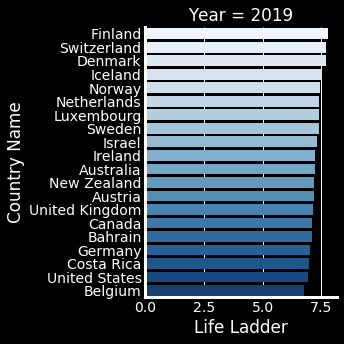

In [174]:
# Create a list of top 20 countries by 2019 ranking by 'Life Ladder'
sns.catplot("Life Ladder", "Country Name", col="Year", data=df_2019_data.sort_values(by='Life Ladder', ascending=False).head(20), kind="bar", palette = 'Blues')

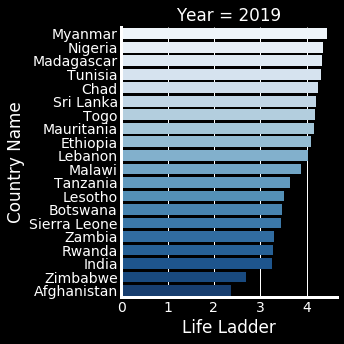

In [175]:
# Create a list of bottom 20 countries by 2019 ranking by 'Life Ladder'
sns.catplot("Life Ladder", "Country Name", col="Year", data=df_2019_data.sort_values(by='Life Ladder', ascending=False).tail(20), kind="bar", palette = 'Blues')

Visualizations such as a heatmap can be a great way to get an idea of how the data correlates together. I've used one below with colours focused on both positive and negative correlation.

In [176]:
# Create correlation map of the factors being used
corr_map = full_df_notna.corr()
corr_map.style.background_gradient(cmap='coolwarm')

,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Fertility Rate,Suicide Rate,Population
Year,1,0.0312134,0.0359272,-0.00830665,0.108807,0.21068,-0.0387986,-0.0729786,0.00209902,0.185138,-0.0540297,-0.0503488,0.004187
Life Ladder,0.0312134,1,0.793352,0.714178,0.758017,0.517927,0.203333,-0.462872,0.509963,-0.297346,-0.604377,0.112064,-0.0661091
Log GDP per capita,0.0359272,0.793352,1,0.714194,0.856318,0.348189,0.00997147,-0.362062,0.28609,-0.264818,-0.792182,0.249065,-0.0483465
Social support,-0.00830665,0.714178,0.714194,1,0.628594,0.41494,0.0970014,-0.264021,0.422483,-0.439195,-0.544702,0.269971,-0.13699
Healthy life expectancy at birth,0.108807,0.758017,0.856318,0.628594,1,0.390605,0.0240706,-0.341443,0.331589,-0.20855,-0.844129,0.0786473,-0.0135075
Freedom to make life choices,0.21068,0.517927,0.348189,0.41494,0.390605,1,0.324289,-0.495223,0.629102,-0.305223,-0.266227,0.0121504,0.0736403
Generosity,-0.0387986,0.203333,0.00997147,0.0970014,0.0240706,0.324289,1,-0.298836,0.348435,-0.107083,0.0164368,-0.145928,-0.00520413
Perceptions of corruption,-0.0729786,-0.462872,-0.362062,-0.264021,-0.341443,-0.495223,-0.298836,1,-0.320011,0.348628,0.162303,-0.0277531,0.0644293
Positive affect,0.00209902,0.509963,0.28609,0.422483,0.331589,0.629102,0.348435,-0.320011,1,-0.370655,-0.184801,-0.0414112,0.0885416
Negative affect,0.185138,-0.297346,-0.264818,-0.439195,-0.20855,-0.305223,-0.107083,0.348628,-0.370655,1,0.17865,-0.250123,-0.0548422


<p>While correlation between factors themselves doesn't necessarily indicate anything, it is interesting to note which factors here have correlation and the potential implication on the data.</p>
<p>There is some correlation between some of the factors in the data. Some of them correlate fairly strongly such as "Healthy life expectancy at birth" vs. "Log GDP per capita" at 0.86 and "Log GDP per capita" vs. "Life Ladder" itself at 0.79. As these are all used in the happiness estimate, it suggests that 'Log GDP per capita' tends to be the biggest indicator of their 'Life Ladder' score as well as on a persons 'Healthy life expectancy at birth'. Perhaps money really does buy happiness? Or are results of "Log GDP per capita" simply being counted multiple times across factors? We will need to investigate further.</p>
<p>It's also interesting to note that while the 'Life Ladder' score correlates well with 'Log GDP per capita', 'Social support', and 'Healthy life expectancy at birth',  'Log GDP per capita' actually correlates at least as well with all of them -indicating that 'Log GDP per capita' seems to be the strongest indicator of all as a happiness predictor.</p>
<p>Interestingly, there is also a fairly strong negative correlation between 'Fertility Rate' and several other factors such as 'Life Ladder' - very interesting this correlates with the overall score even though it wasn't in the original data! -, 'Social support', and particularly 'Log GDP per capita' and 'Healthy life expectancy at birth'. These are definitely factors I would like to investigate further.</p>

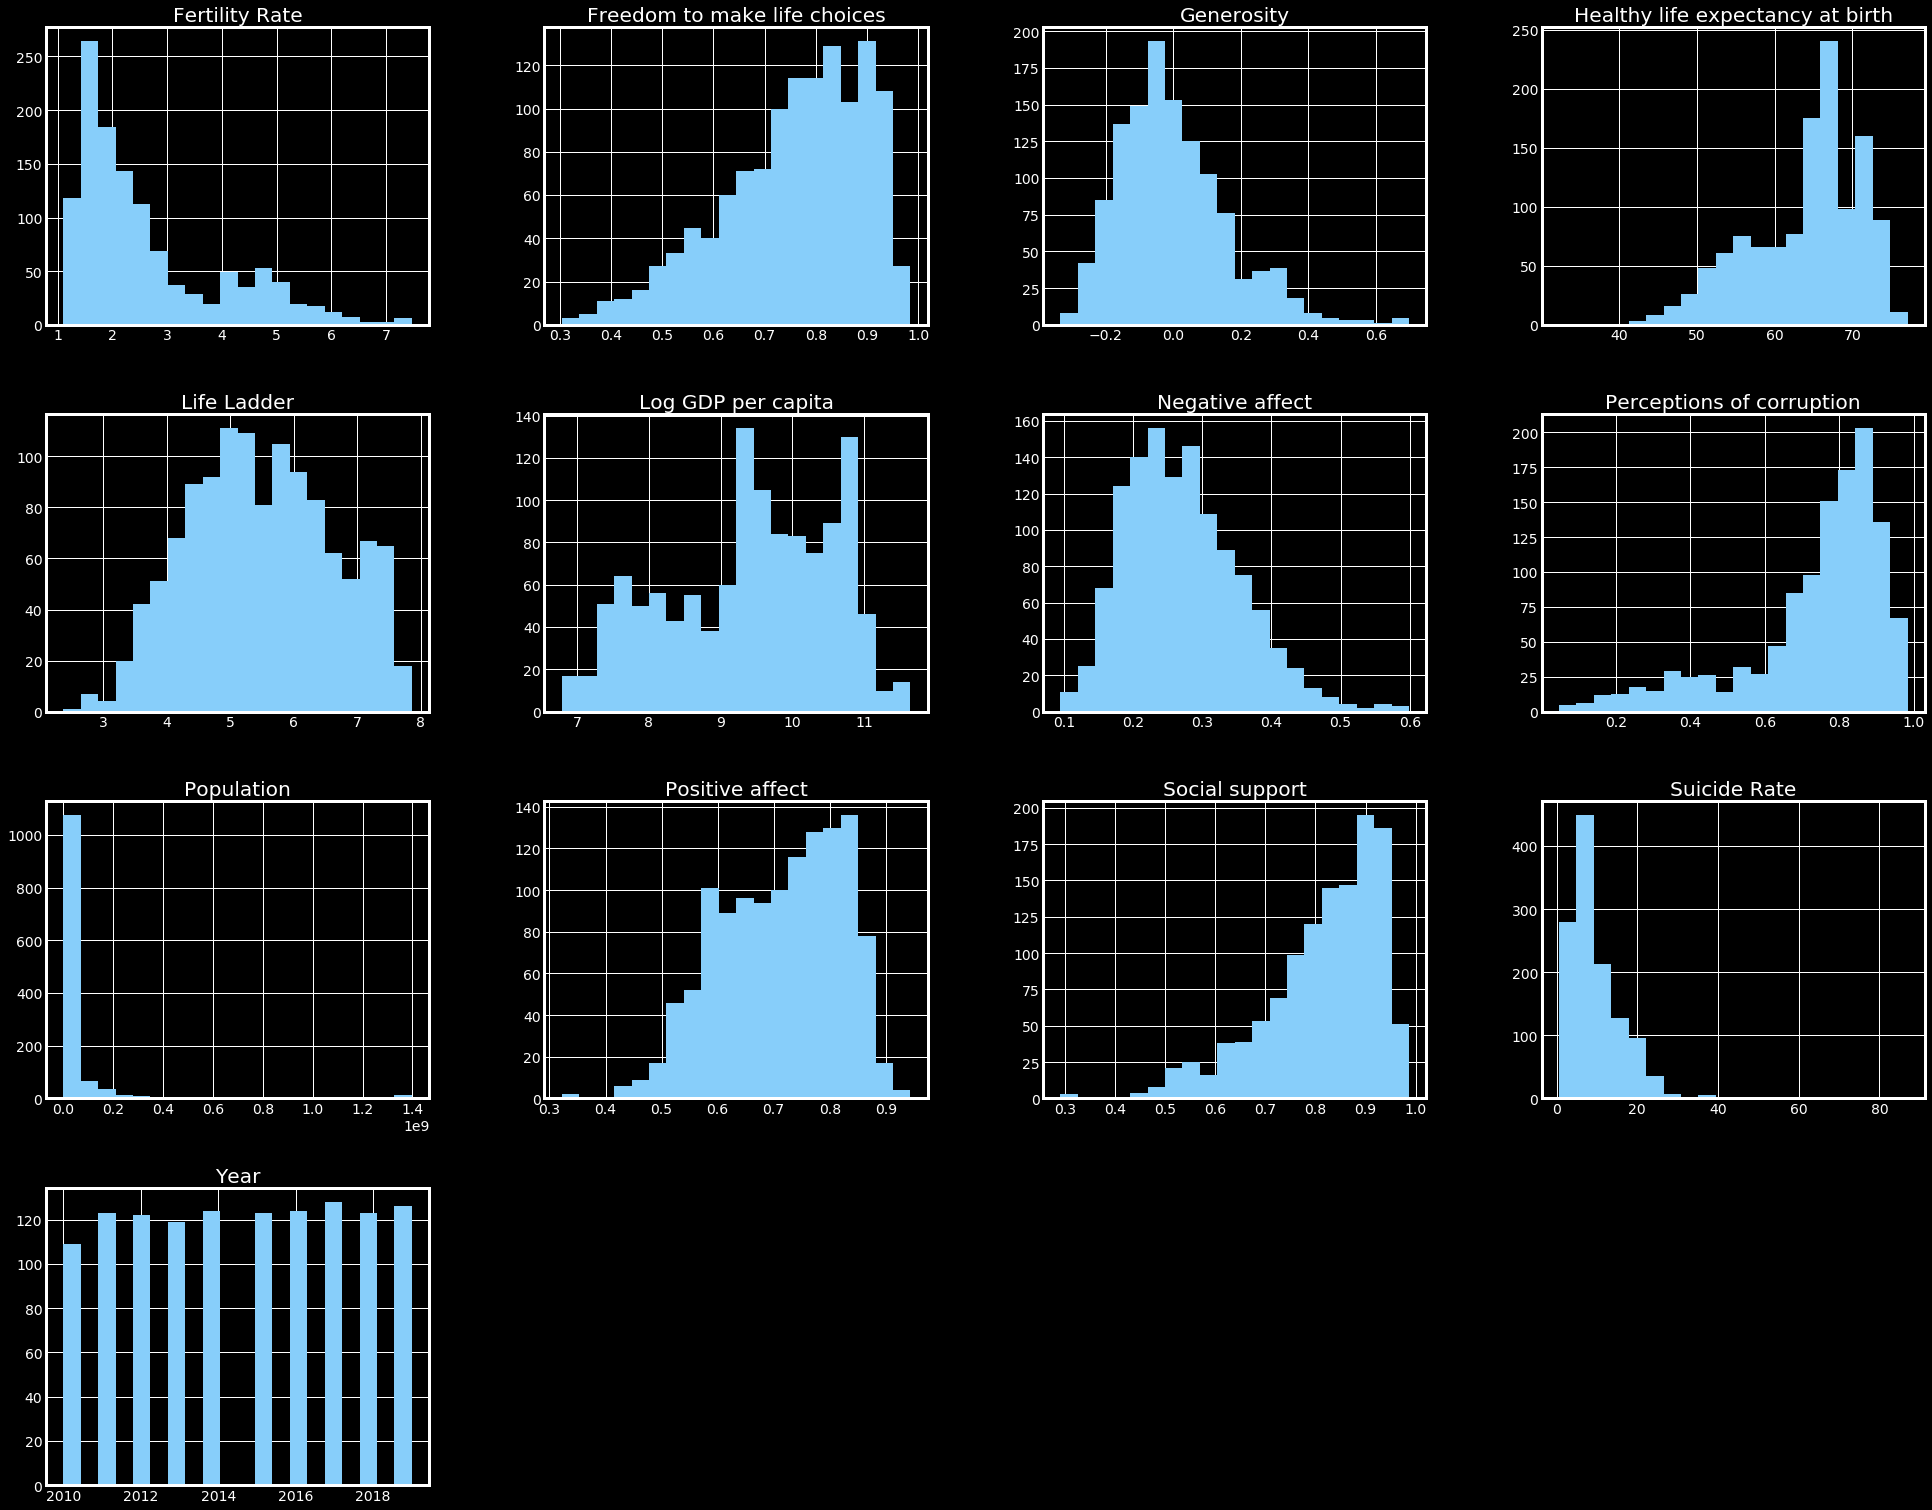

In [177]:
# Produce a series of histograms to see the distribution of the data
full_df_notna.hist(figsize=(30,25),bins=20, color='lightskyblue')
plt.show()

<p>As can be seen from the histograms, the majority of the factors in the dataset are not normally distributed. Many, such as 'Social support' and 'Fertility Rate' are left or right skewed. Others such as 'Fertility Rate' appear to potentially be bimodal while 'Log GDP per capita' appears as if it may be trimodal. </p>
<p>This in itself is not surprising given the type of data and potential interconnectedness of certain factors. The bi/trimodalness of some data is likely attributed to the different classes ('Regions') within the dataset. This is certainly something worth looking further into to analyse the reasons.</p>

We can visualize this further by using a Seaborn pairplot to show the correlations visually.

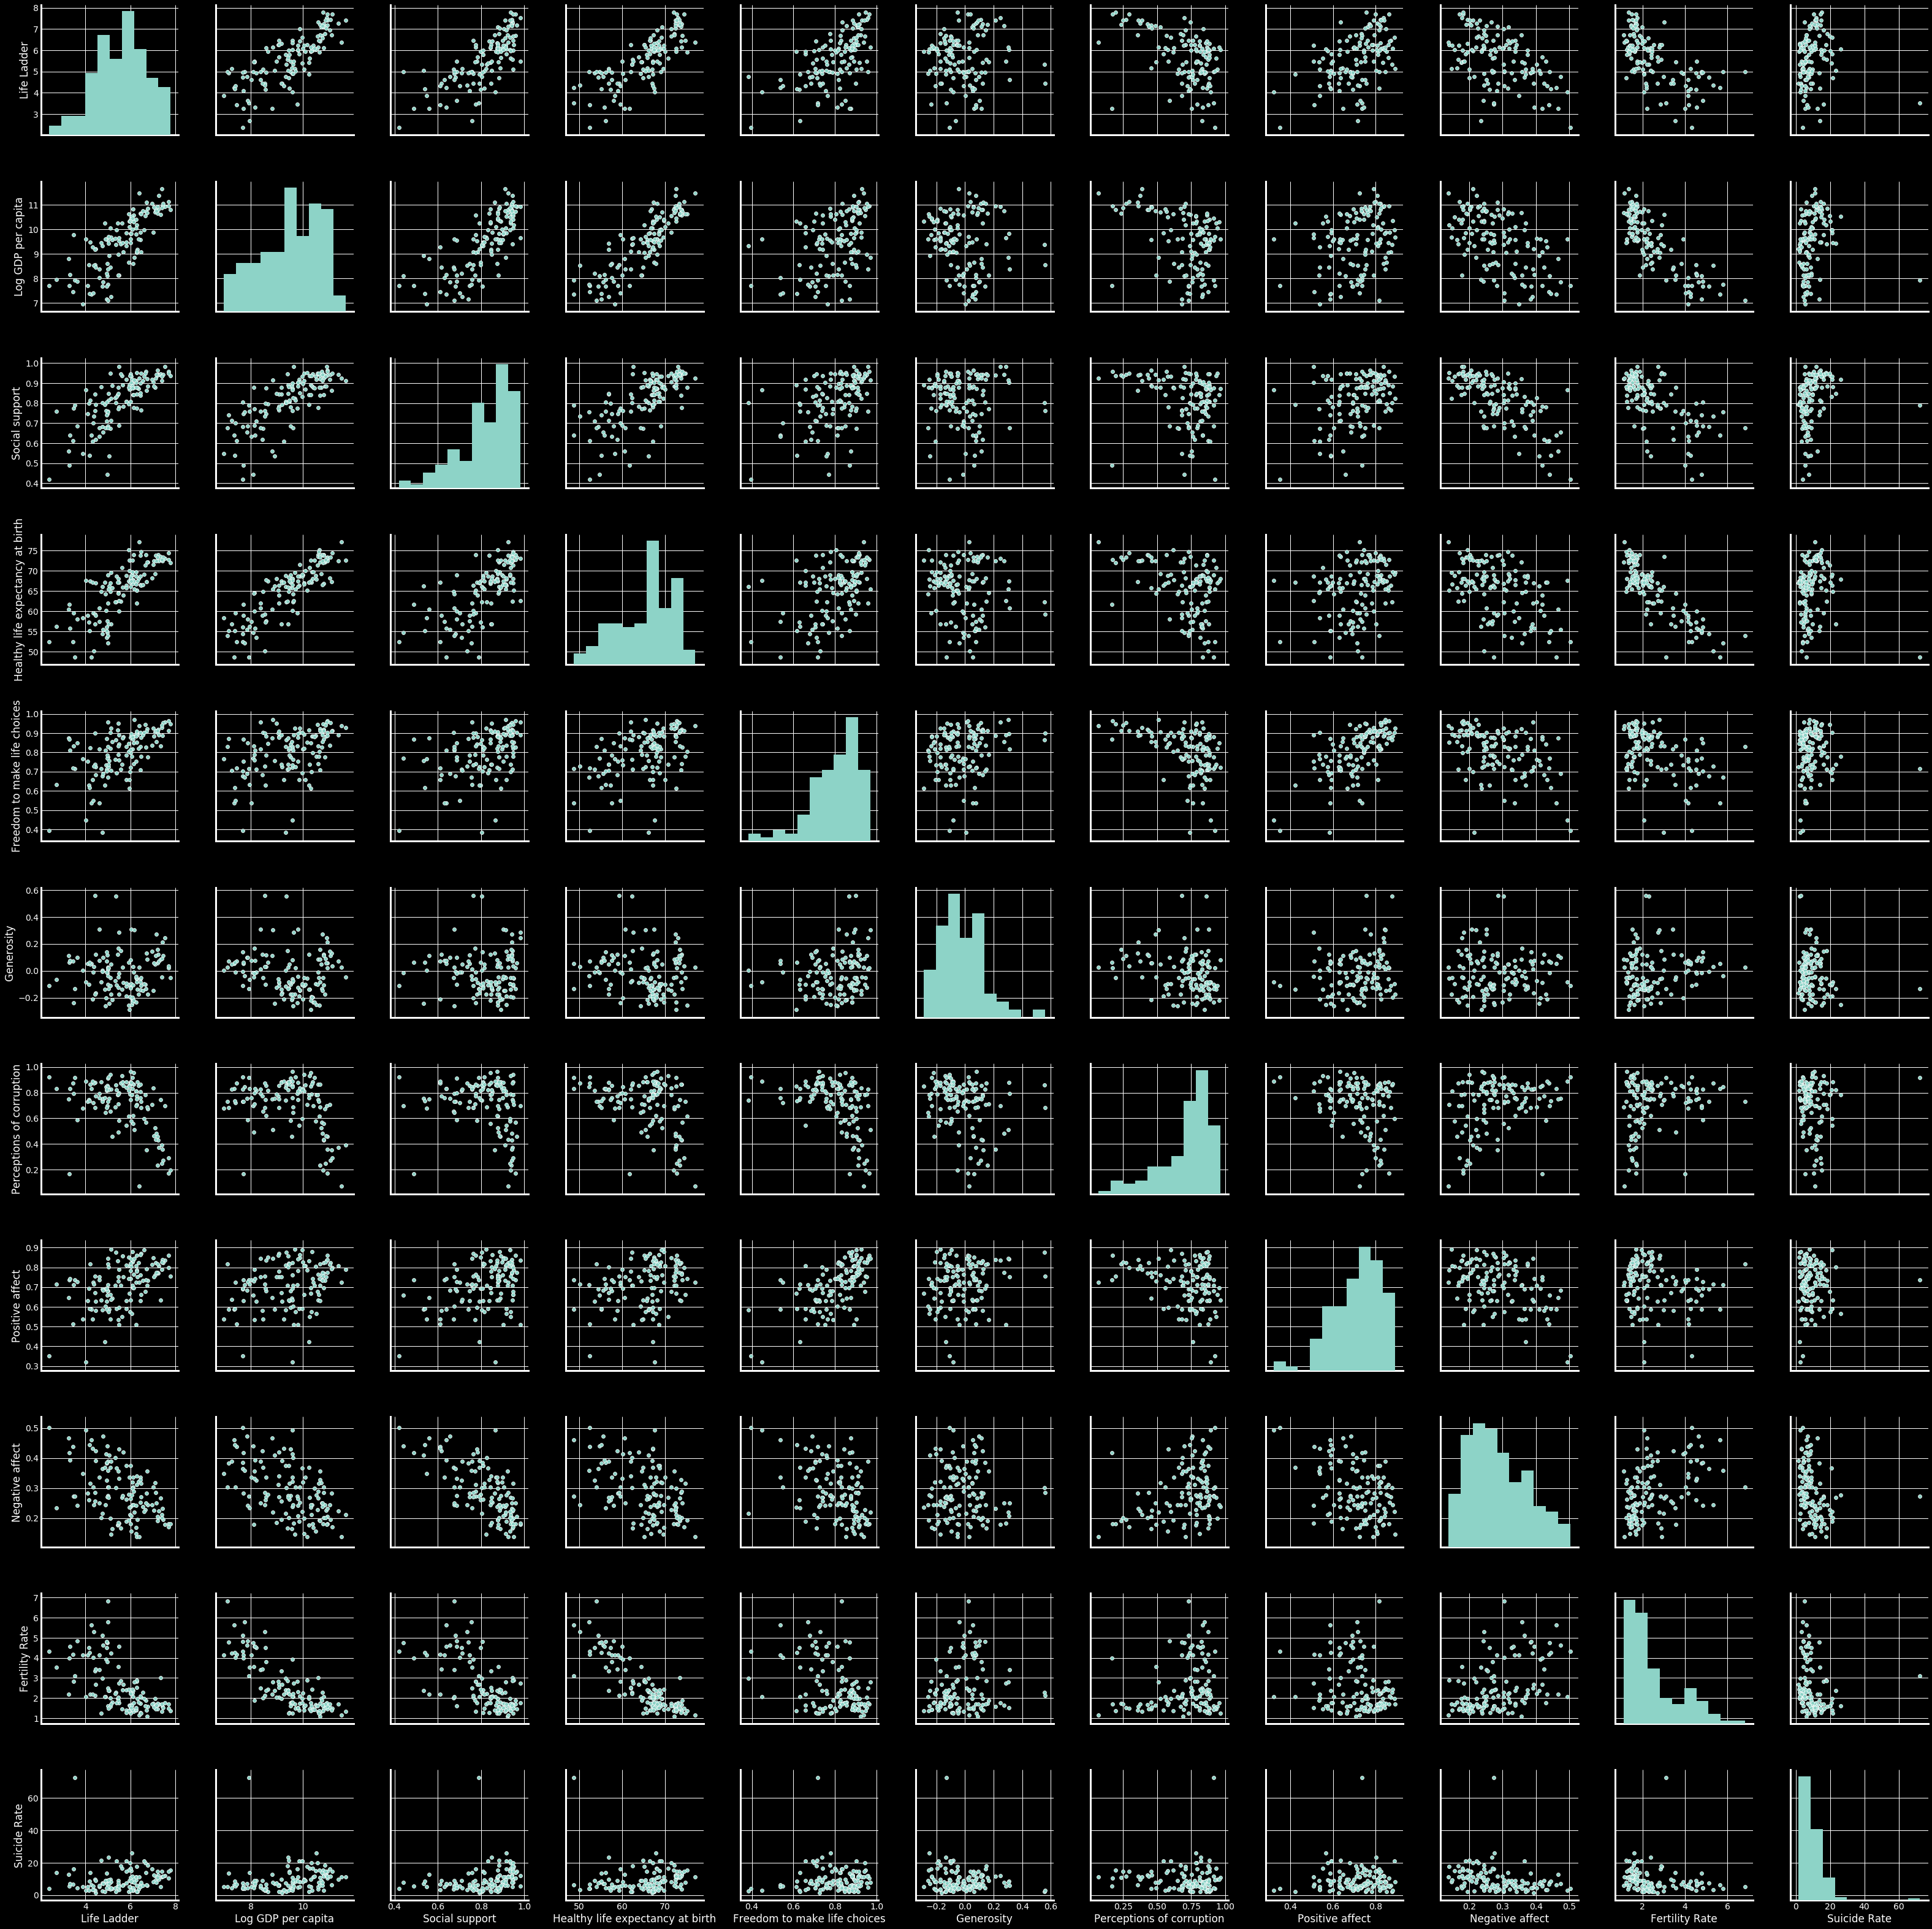

In [178]:
# Pairplot of 2019 data (less 'Year' and 'Population')
sns.pairplot(df_2019_data.drop(['Year', 'Population'], axis=1), height=4, dropna=True)

Below are a few of the above mentioned factors of interest with high correlation plotted against each other in joinplots to take a closer look at the correlation.

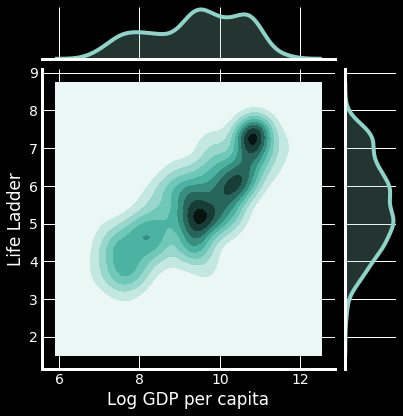

In [179]:
# Create sns.joinplot of 'Log GDP per capita' vs. 'Life Ladder'
sns.jointplot(x=full_df_notna['Log GDP per capita'], y=full_df_notna['Life Ladder'], kind="kde")

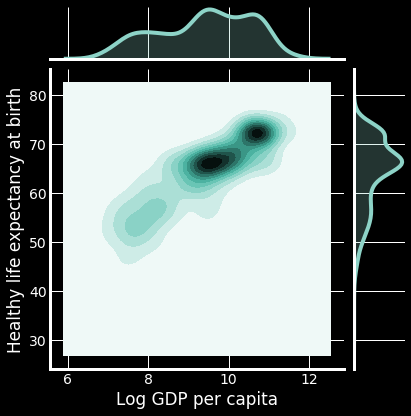

In [180]:
# Create sns.joinplot of 'Log GDP per capita' vs. 'Healthy life expectancy at birth'
sns.jointplot(x=full_df_notna['Log GDP per capita'], y=full_df_notna['Healthy life expectancy at birth'], kind="kde")

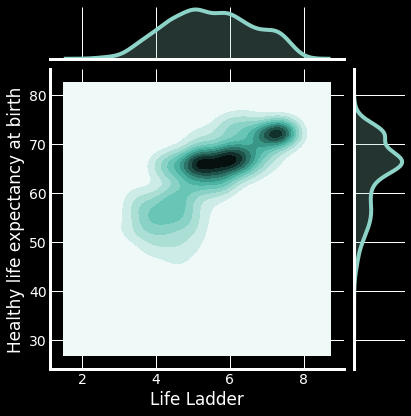

In [181]:
# Create sns.joinplot of 'Life Ladder' vs. 'Healthy life expectancy at birth'
sns.jointplot(x=full_df_notna['Life Ladder'], y=full_df_notna['Healthy life expectancy at birth'], kind="kde")

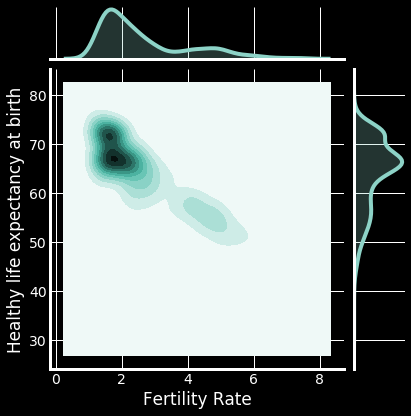

In [182]:
# Create sns.joinplot of 'Fertility Rate' vs. 'Healthy life expectancy at birth'
sns.jointplot(x=full_df_notna['Fertility Rate'], y=full_df_notna['Healthy life expectancy at birth'], kind="kde")

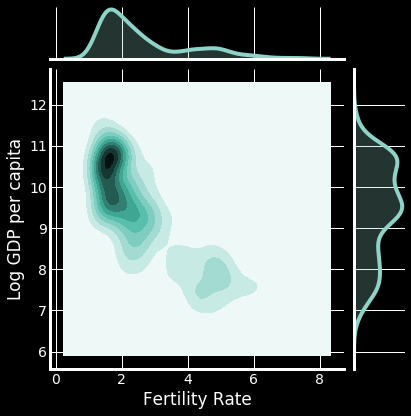

In [183]:
# Create sns.joinplot of 'Fertility Rate' vs. 'Log GDP per capita'
sns.jointplot(x=full_df_notna['Fertility Rate'], y=full_df_notna['Log GDP per capita'], kind="kde")

Having visualized the results, these are all factors all display an interesting correlation which I would like to investigate further in CW2, particularly the 'Fertility Rate' data, which I suspect may follow certain other factors in a negative correlation, and 'Log GDP per capita', which appears may be the lead indicator of many factors.

#### Further visualizations to explore the classifier 'Region'

<p>Swarmplots are also a good technique to visualize and compare against a classifier the data can be sorted by. </p>

<p>Given the bi/trimodalness of some of the distributions, I suspect it may be due to different groups existing within the data - very possibly to do with the 'Region' the country is in. I want to explore this further. Swarmplots are a good method we can use here to investigate the data visually.</p>

<p>As I noted in the correlations from the heatmap, it appears 'Log GDP per capita' has the biggest influence on the data (correlating even more strongly than the 'Life Ladder' score itself with many factors). To explore this further, the swarmplots below will focus on those two factors, 'Life Ladder', and 'Log GDP per capita' with the countries based on 'Region'. </p>

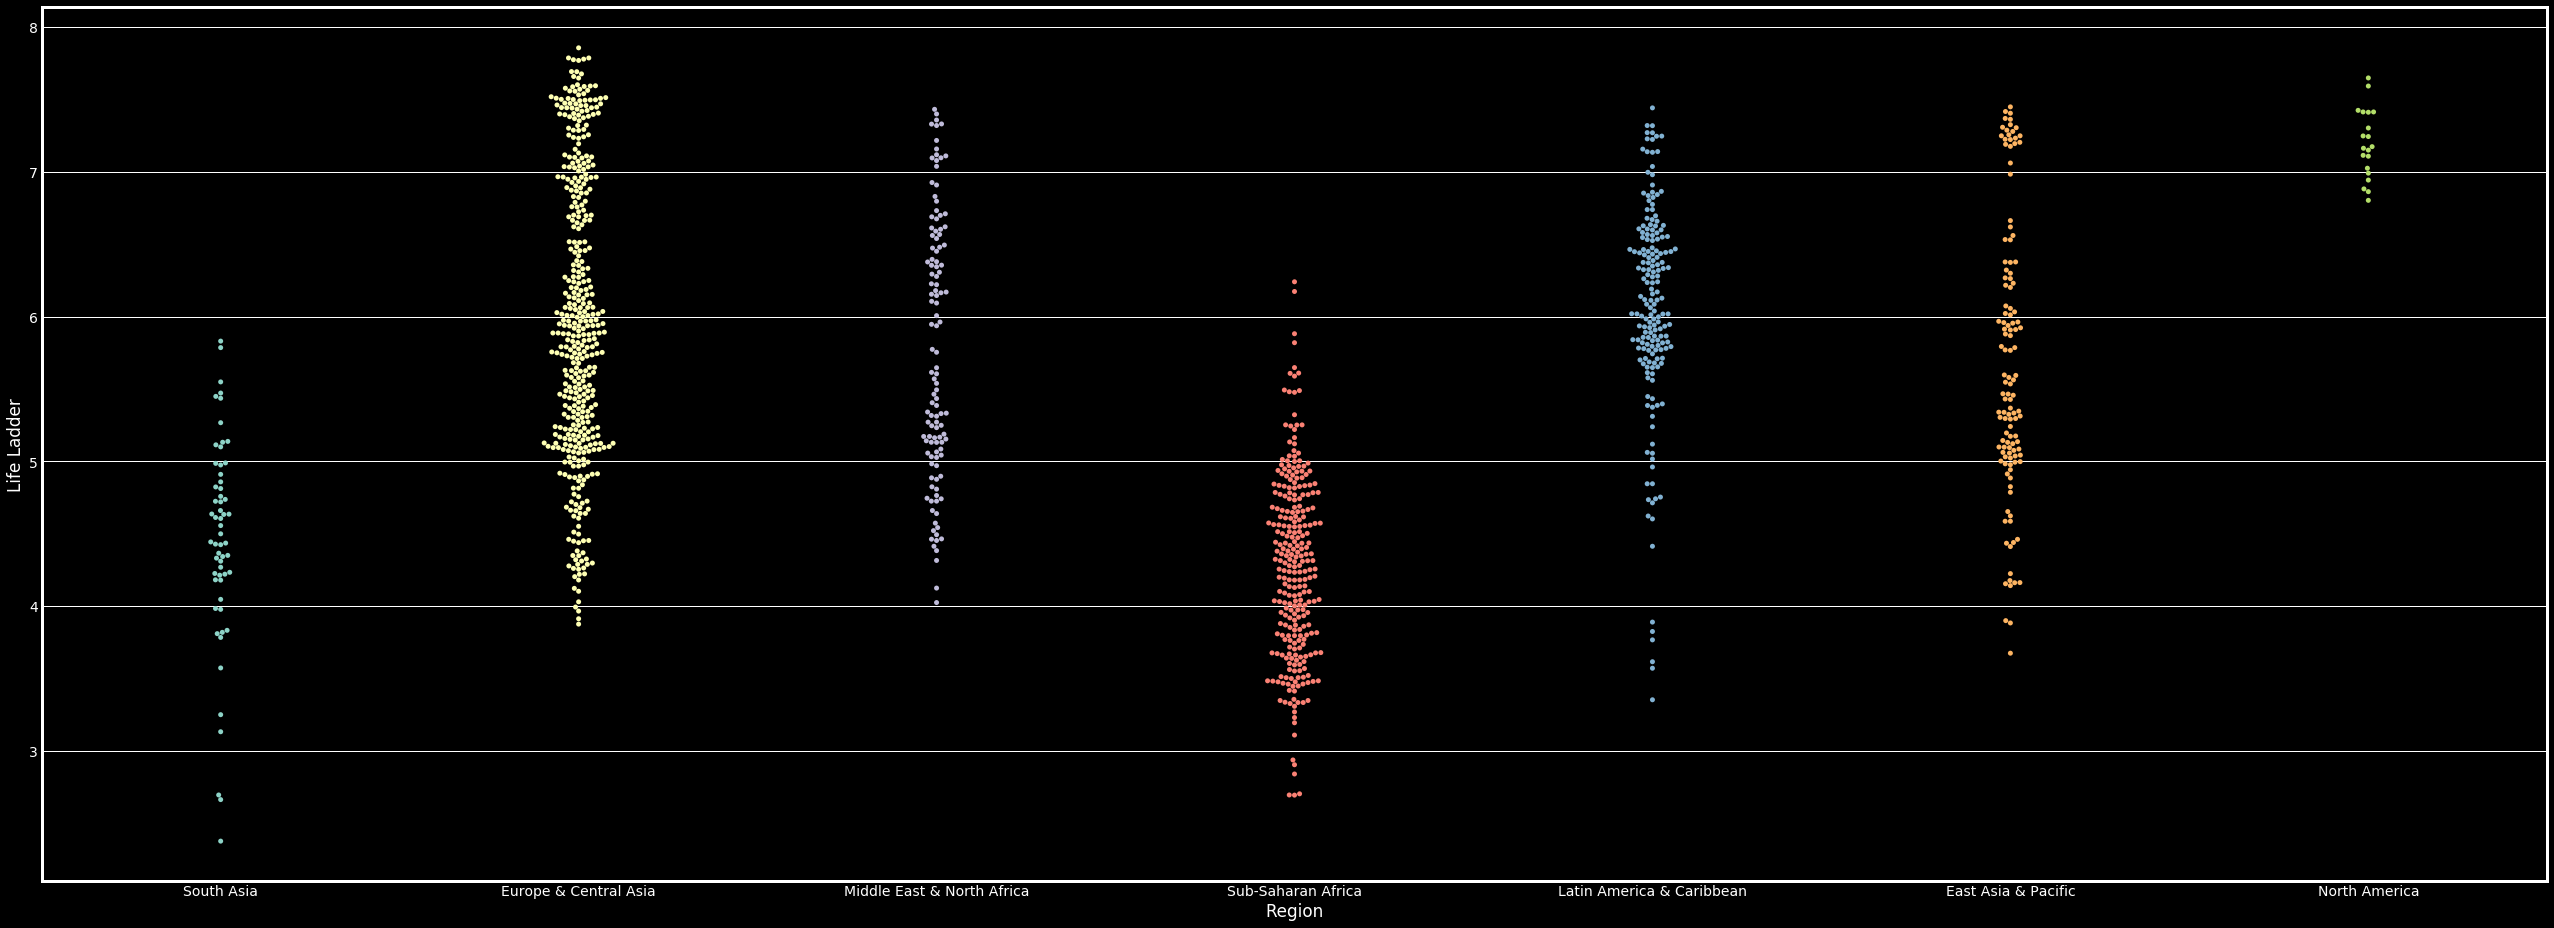

In [184]:
# Swarm plot of 'Life ladder' score with countries sorted by 'Region'
plt.figure(figsize=(40,15))
sns.swarmplot(full_df_notna['Region'],full_df_notna['Life Ladder'])

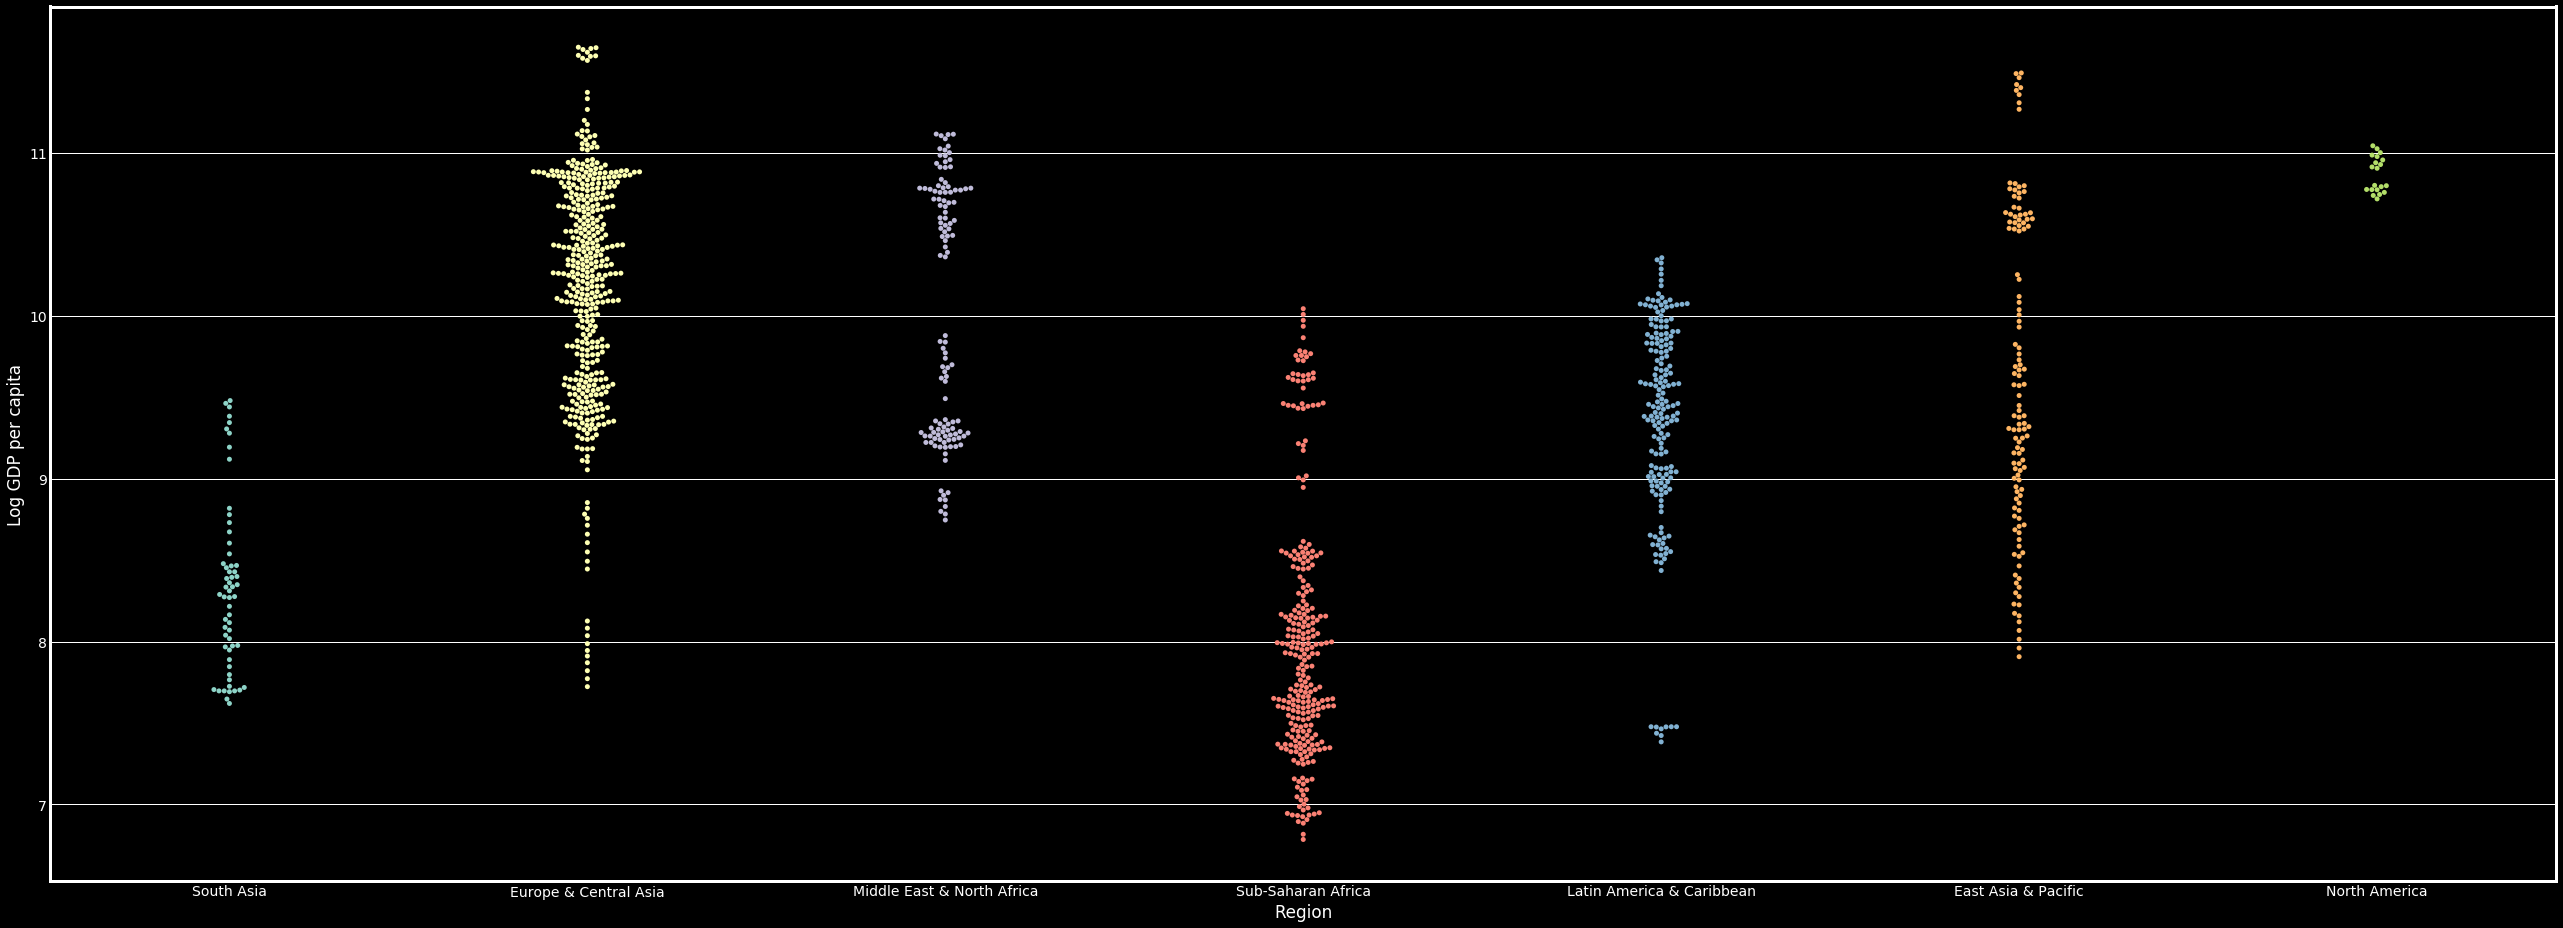

In [185]:
# Swarm plot of 'Log GDP per capita' with countries sorted by 'Region'
plt.figure(figsize=(40,15))
sns.swarmplot(full_df_notna['Region'],full_df_notna['Log GDP per capita'])

<p>Visually, there seems to be high correlation between the two. Visually we can see the 'Log GDP per capita' for each 'Region' matches very closely with their 'Life Ladder' score. </p>
<p>We can also see where the potential bi/trimodalness (and general lack of normal distribution) of the data comes from where comparing across the regions. Certain regions such as 'Middle East and North Africa' seem to be bimodal themselves (perhaps not surprisingly given the fact that 'Region' in itself is a combination of two regions.</p>
<p>This is something to consider in the data: Should some of these regions in 'Region' be broken down futher into sub-regions for accuracy?</p>

I want to visual these in a different way. A barplot is useful to see the mean and spread of the data while still allowing to compare across groups. To visualize the above data in this way, I've used a factorplot below to further investigate "Life Ladder" and "Log GDP per capita" data by "Region". I've done it by first and least year (2010, 2019) of the period to also compare if there is a lot of change across the region during the period.

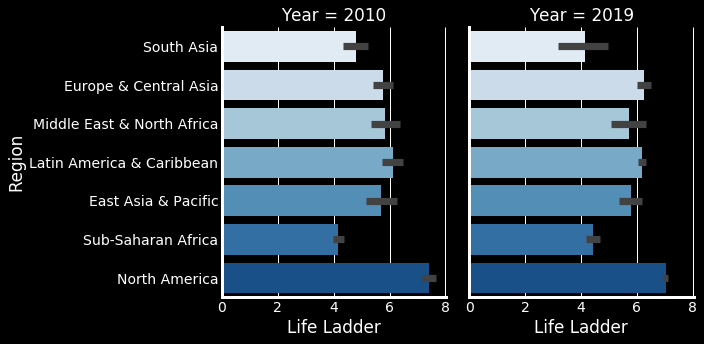

In [186]:
# Create sns.factorplot of "Life Ladder" against "Region" for 2010 and 2019
sns.catplot("Life Ladder", "Region", col="Year", data=df_2010_2019, kind="bar", palette = 'Blues')

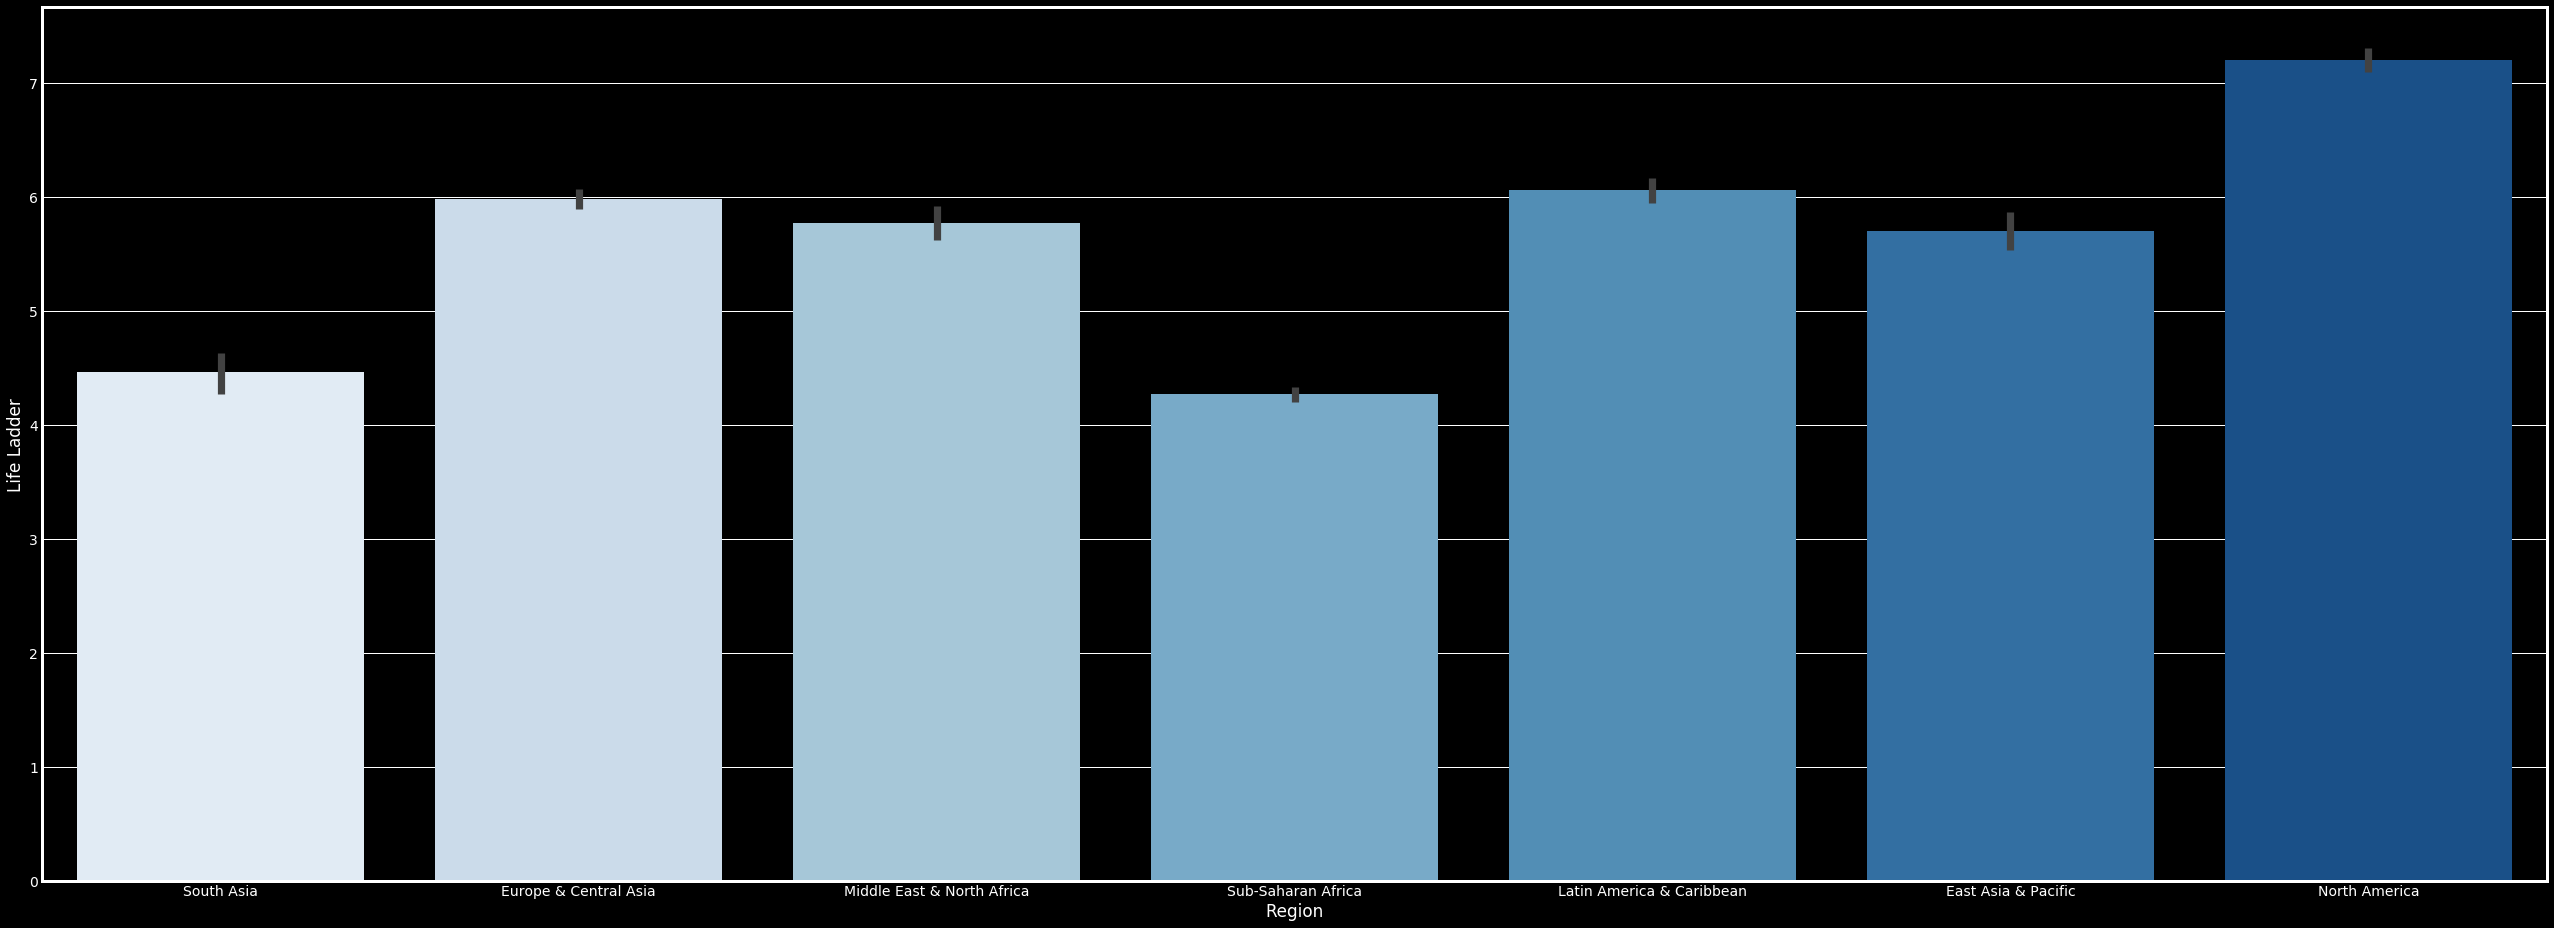

In [187]:
# Barplot of same data over the whole period
plt.figure(figsize=(40,15))
sns.barplot(x=full_df_notna['Region'], y=full_df_notna['Life Ladder'], palette = 'Blues')

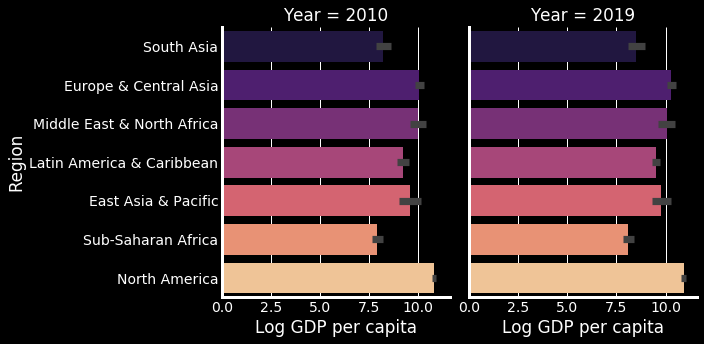

In [188]:
# Create sns.factorplot of "Log GDP per capita" against "Region" for 2010 and 2019
sns.catplot("Log GDP per capita", "Region", col="Year", data=df_2010_2019, kind="bar", palette = 'magma')

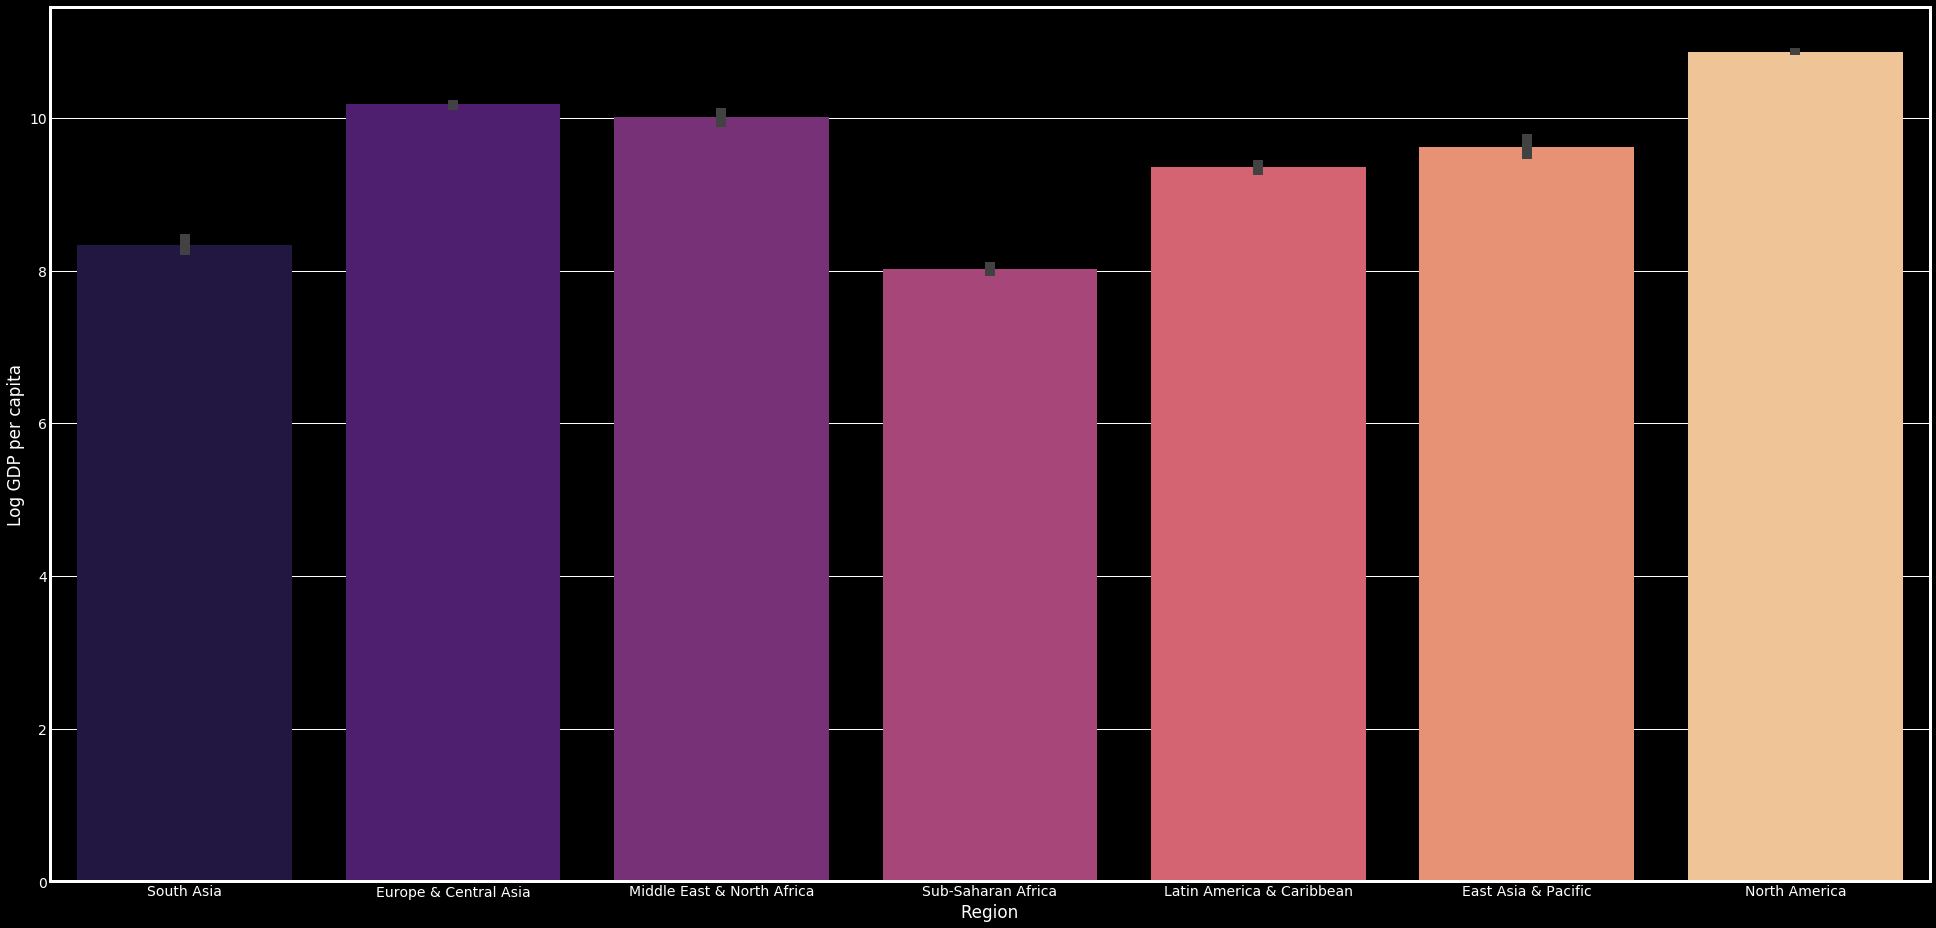

In [189]:
# Barplot of same data over the whole period
plt.figure(figsize=(30,15))
sns.barplot(x=full_df_notna['Region'], y=full_df_notna['Log GDP per capita'], palette = 'magma', errwidth=10)

### Summary of key findings/insight

<p>Based on the EDA, several key points have come up which require further investigation.</p>
<p>Several of the factors contained in the dataset have fairly high (0.70+) correlation to each other, suggesting they could both either be increasing as a result of the happiness scores or a cause of the increase in perceived happiness. It also raises the question of what is the biggest single factor leading to 'The World Happiness Report' happiness results.</p>
<p>The EDA suggests that 'Log GDP per capita' may in fact be the biggest indicator of a nations perceived happiness. This is something I will investigate further in CW2 as it seems a to a potentially flawed assumption that 'Log GDP per capita' has such a big impact on a nations happiness. It should also be noted that the high correlation of 'Log GDP per capita' with other factors suggests it could be being counted multiple times over in various forms, hence the large impact.</p>
<p>It is also interesting to note the reasonably strong (0.55-0.85) correlation between 'Fertility Rates' and several of the other factors including the 'Life Ladder' itself. While the reasons for why this is a negative correlation are slightly outside the scope of the initial analysis, it is an interesting finding, particularly given it wasn't included in the dataset of 'The World Happiness Report', and could potentially be used as quite a good indicator.</p>
<p>Finally, the 'Region' of a country tends to have quite a big impact on it's happiness values across many of the factors. This could be very useful from a classification stand point to predict the classification of new data and very interesting to see if we can find any 'stereotypes' in the data where we could use them to classify a hypothetical made up country given values for each factor and to see how much any one factor gives weight to this.</p>

### Conclusion and further work

<p>Based on my key findings above, I would like to analyze the data further using machine learning to try and find out what factors contribute the most to the happiness indicator - 'Life Ladder'.</p> 
<p>From this I want to see if we can build an accurate model which can predict values with a high accuracy to make projections for future years.</p> 
<p>I would also like to build a 'country classifier' which can accurate perform classification not only on real data but with fictional data for made up countries given to it. I think it would be interesting to have a model accurate enough, and data classified enough, to accurately predict which part of the world a country would be in, if it were a real country.</p>

<p><b>References:</b></p>
<p>[1] The World Happiness Report,  https://worldhappiness.report/ - accessed 29/06/2021</p>
<p>[2] The World Happiness Report - FAQs,  https://worldhappiness.report/faq/ - accessed 29/06/2021</p>
<p>[3] Gallup,  https://www.gallup.com/home.aspx - accessed 29/06/2021</p>
<p>[4] The World Bank  https://www.worldbank.org/en/home - accessed 29/06/2021</p>
<p>[5] United Nations Sustainable Development Solutions Network,  https://www.unsdsn.org/ - accessed 04/07/2021</p>
<p>[6] The New York Post, 'That world happiness survey is complete crap',  https://nypost.com/2017/03/22/that-world-happiness-survey-is-complete-crap/ - accessed 04/07/2021</p>
<p>[7] 'The Measure Matters: An Investigation of Evaluative and Experience-Based Measures of Wellbeing in Time Use Data', Dolan et al, 'Springer Link', published August 2016, https://link.springer.com/article/10.1007/s11205-016-1429-8 - accessed 04/07/2021</p>